In [1]:
import numpy as np
import numpy.ma as ma

import time
import importlib as imp

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 1
%aimport sigproc
%aimport config_svm
%aimport svm
%aimport uji_vis

In [127]:
imp.reload(uji_vis)
from uji_vis import * 

In [4]:
change_printopt = config_svm.printoptions

In [5]:
pic_dir = config_svm.pic_dir

In [6]:
import sys
Eps =  config_svm.Eps #sys.float_info.epsilon

In [7]:
%store -r

In [8]:
real_data = real_data_full[:, :11]

In [9]:
trans_real_data = trans_real_data_full[:, :11]

# 3. Эксперименты на реальных данных

In [14]:
import re

r_strokenum = re.compile('\s+NUMSTROKES (\d)')
r_pntnum = re.compile('\s+POINTS (\d+) #*')
r_word = re.compile('WORD ([a-zA-Z0-9]) (trn|tst)_(UJI|UPV)_W(\d\d)-(01|02)', re.A)
strokenum = 0
num = 0
cnt = 0
max_d = 0

file_name = 'data/uji-penchars/ver2/ujipenchars2.txt'
data_file = open(file_name)
text_data = data_file.read().splitlines()
it_text = iter(text_data)

for line in it_text:
    if r_word.match(line):
        letter = r_word.match(line).group(1)
        num = 0
        line = next(it_text)
        strokenum = int(r_strokenum.match(line).group(1))
        cnt += 1
        while(strokenum):
            line = next(it_text)
            num += int(r_pntnum.match(line).group(1))
            strokenum -= 1 
        if max_d < num:
            max_d = num
            #print(letter, max_d) - Напечатать буквы макимизирующие вырпжение

In [15]:
print("Больше всего точек буквы = ", max_d)
masked_fill_value = 1.e-20
real_data = masked_fill_value*np.ones((len(keys), 60, 2, 2, max_d), dtype=np.float64)

Больше всего точек буквы =  392


In [16]:
print("Mbytes in data stored as masked arrays with length {0:d}: {1:.5f} Mb".format(max_d, real_data.nbytes / 2**(20)))

Mbytes in data stored as masked arrays with length 392: 44.50195 Mb


In [17]:
r_word = re.compile('WORD ([a-zA-Z0-9]) (trn|tst)_(UJI|UPV)_W(\d\d)-(01|02)', re.A)
r_pntnum = re.compile('\s+POINTS (\d+) #((\s+-?\d+)*)')

it_text = iter(text_data)
for line in it_text:
    if r_word.match(line):
        letter, UnivDivider, writer, repet = r_word.match(line).group(1, 3, 4, 5)
        line = next(it_text)
        strokenum = int(r_strokenum.match(line).group(1))
        stroke_offset = 0
        while(strokenum):
            line = next(it_text)
            pntnum_m = r_pntnum.match(line)
            pnts_num = int(pntnum_m.group(1))
            #print(pnts_num)
            #print(pntnum_m.group(2)[1:].split(sep=' '))
            pnts = np.array([int(pnt_xy) for pnt_xy in pntnum_m.group(2)[1:].split(sep=' ')])
            divider = 1
###can change divider parametr
            if UnivDivider == 'UPV':
                divider = UPV_ratio/UJI_ratio 
            #print(lexicon[letter], int(writer) - 1, int(repet) - 1)
            #try:
            real_data[lexicon[letter], int(writer) - 1, int(repet) - 1, 0,
                      stroke_offset:stroke_offset + pnts_num] = pnts[::2]/divider # x coords
            real_data[lexicon[letter], int(writer) - 1, int(repet) - 1, 1,
                      stroke_offset:stroke_offset + pnts_num] = pnts[1::2]/divider # y coords
            #except ValueError:
            #    print(pnts.shape)
            stroke_offset += pnts_num
            strokenum -= 1

In [18]:
real_data = ma.masked_values(real_data, value=masked_fill_value)

In [ ]:
with config_svm.printoptions(suppress=True):
    print(real_data)

In [5]:
real_data, real_data_full = real_data[:, :11], real_data

In [20]:
%store real_data_full

Stored 'real_data_full' (MaskedArray)


In [14]:
trans_real_data_full = transform_set(real_data_full)

In [15]:
%store trans_real_data_full

Stored 'trans_real_data_full' (MaskedArray)


#### Трансформированные символы

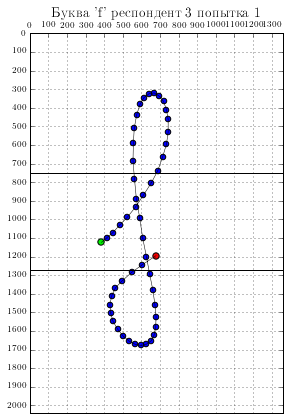

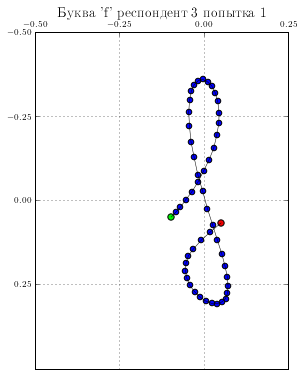

In [16]:
ind = (lexicon['f'], 2, 0)
vis_letters(ind, real_data, figsize=frame_size/3)
vis_letters_trans(ind, trans_real_data, figsize=frame_size/3)

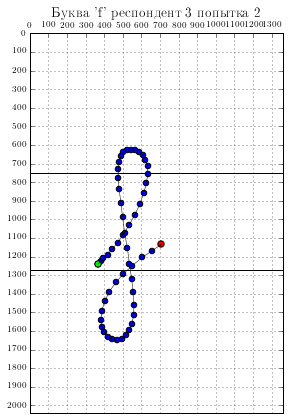

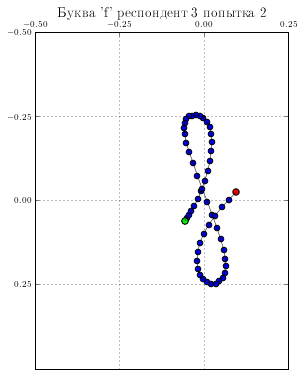

In [51]:
ind = (lexicon['f'], 2, 1)
vis_letters(ind, real_data, figsize=frame_size/3)
vis_letters_trans(ind, trans_real_data, figsize=frame_size/3)

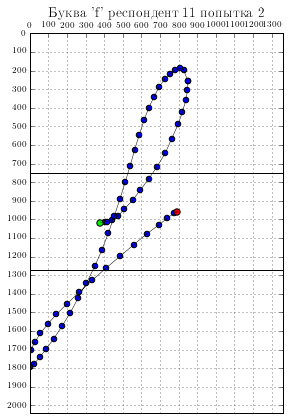

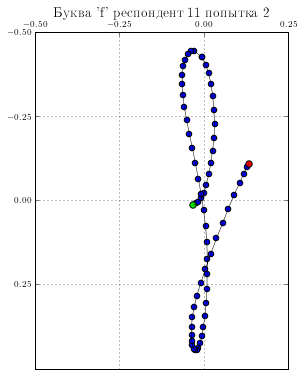

In [52]:
ind = (lexicon['f'], 10, 1)
vis_letters(ind, real_data, figsize=frame_size/3)
vis_letters_trans(ind, trans_real_data, figsize=frame_size/3)

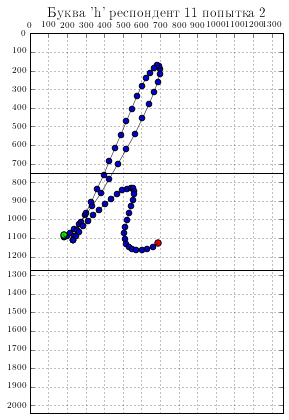

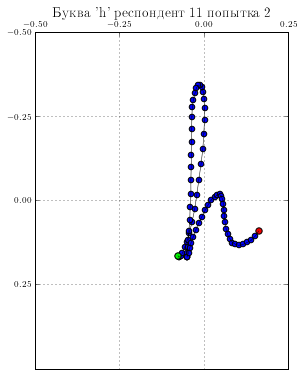

In [53]:
ind = (lexicon['h'], 10, 1)
vis_letters(ind, real_data, figsize=frame_size/3)
vis_letters_trans(ind, trans_real_data, figsize=frame_size/3)

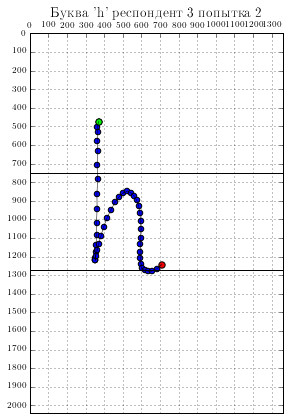

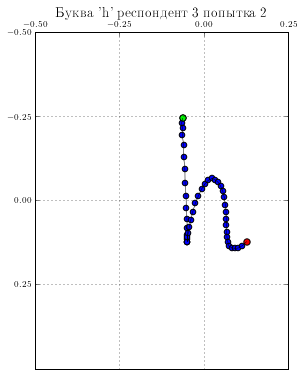

In [55]:
ind = (lexicon['h'], 2, 1)
vis_letters(ind, real_data, figsize=frame_size/3)
vis_letters_trans(ind, trans_real_data, figsize=frame_size/3)

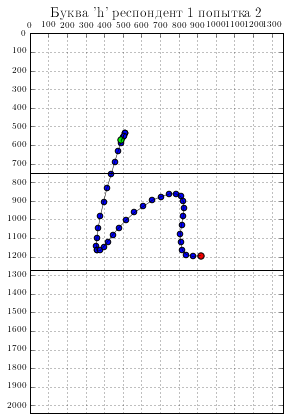

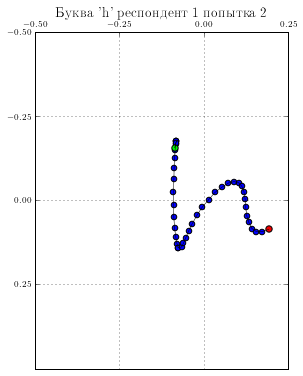

In [56]:
ind = (lexicon['h'], 0, 1)
vis_letters(ind, real_data, figsize=frame_size/3)
vis_letters_trans(ind, trans_real_data, figsize=frame_size/3)

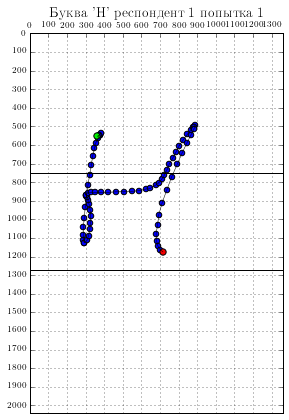

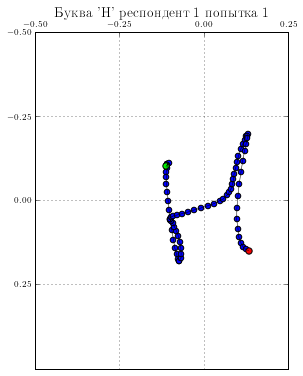

In [62]:
ind = (lexicon['H'], 0, 0)
vis_letters(ind, real_data, figsize=frame_size/3)
vis_letters_trans(ind, trans_real_data, figsize=frame_size/3)

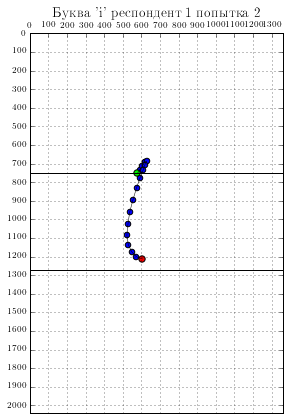

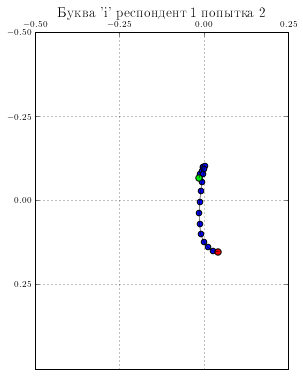

In [58]:
ind = (lexicon['i'], 0, 1)
vis_letters(ind, real_data, figsize=frame_size/3)
vis_letters_trans(ind, trans_real_data, figsize=frame_size/3)

#### Исходные символы

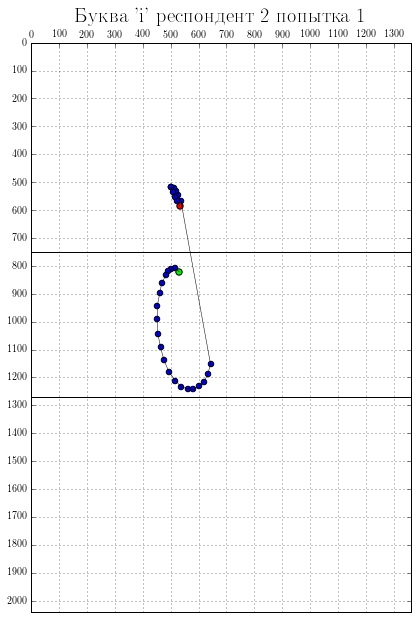

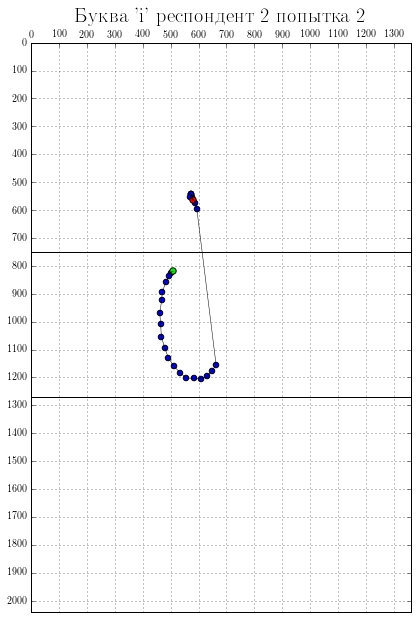

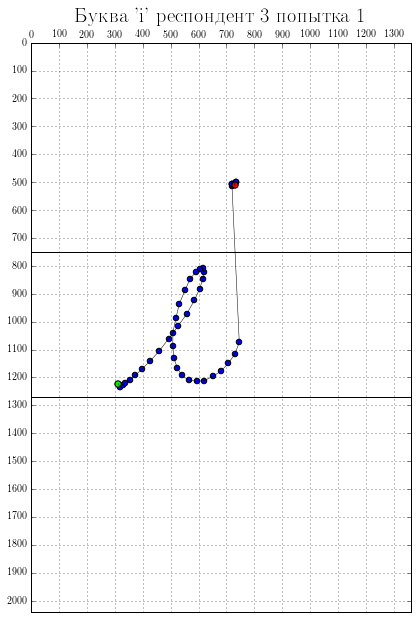

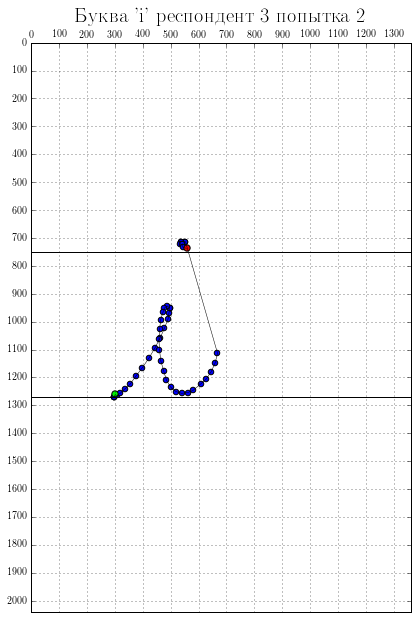

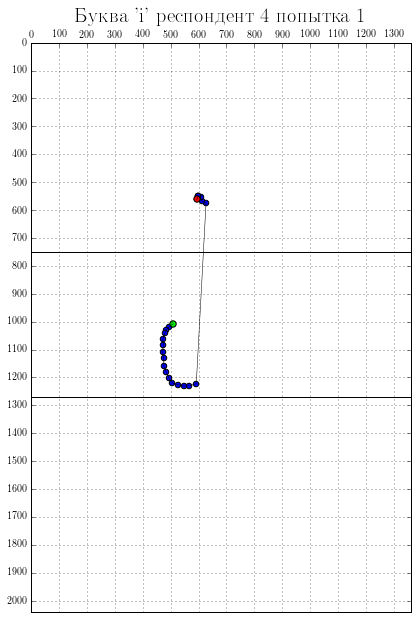

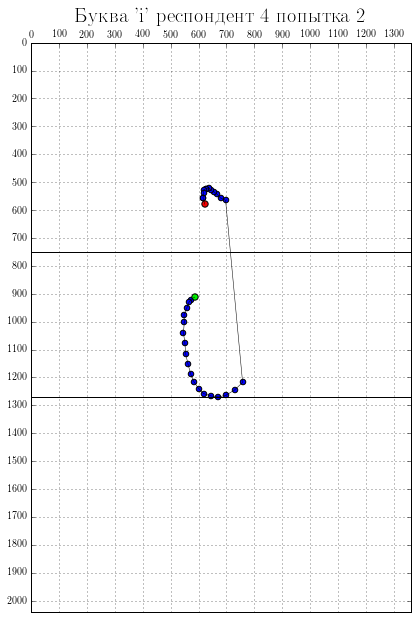

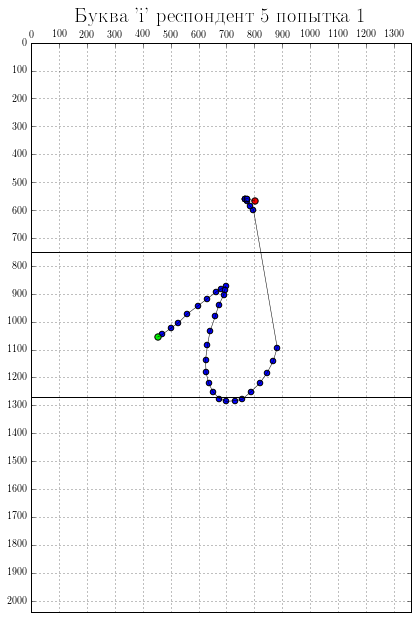

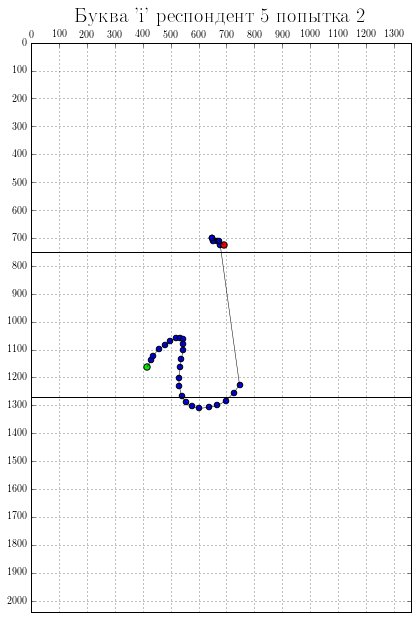

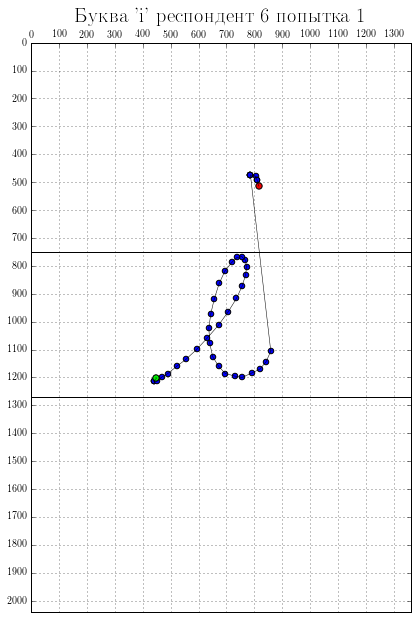

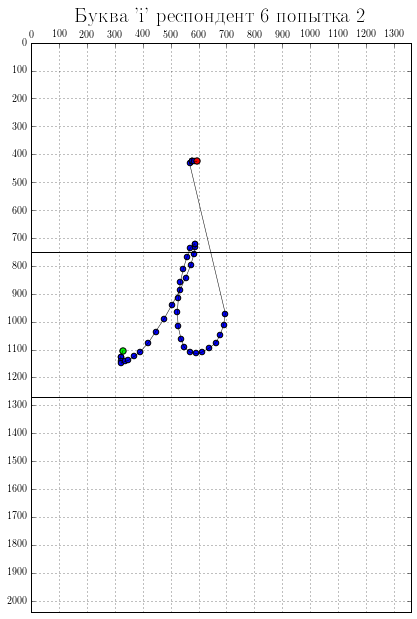

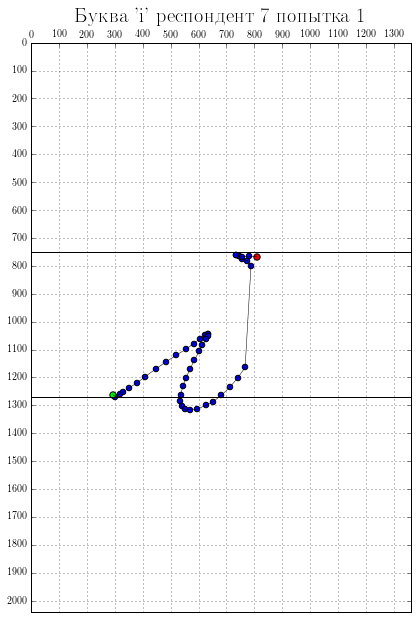

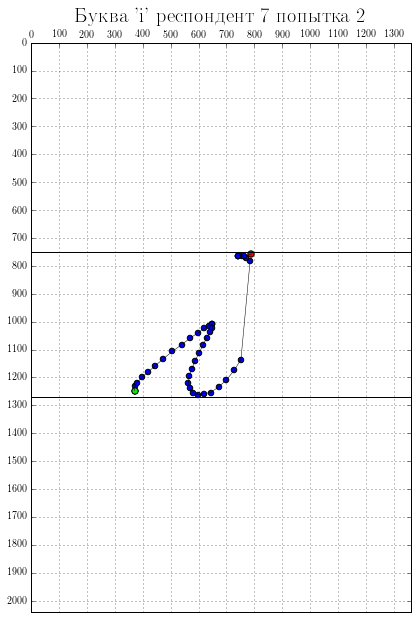

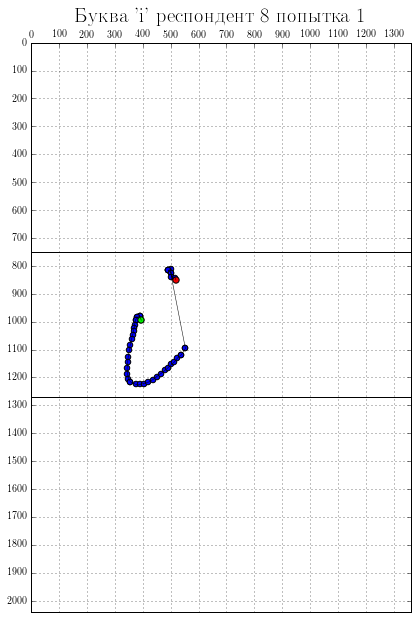

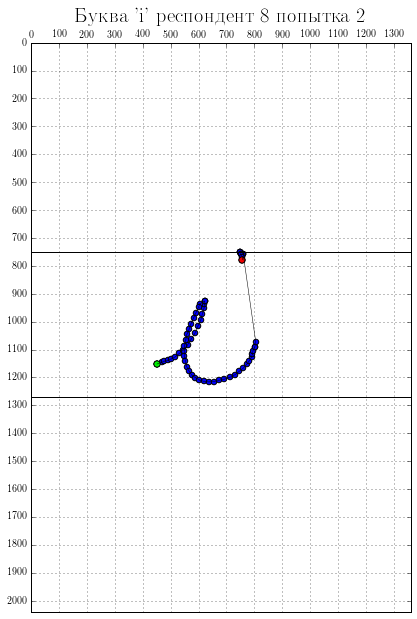

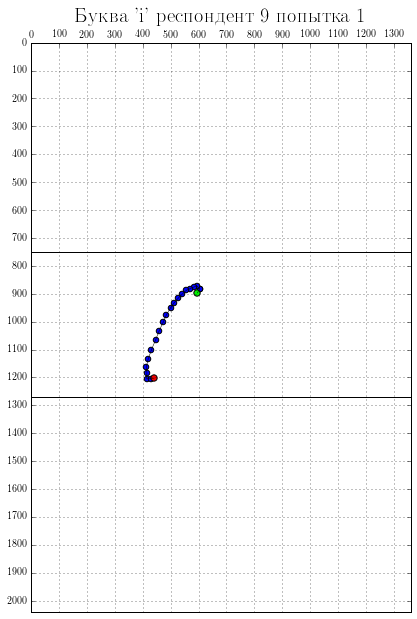

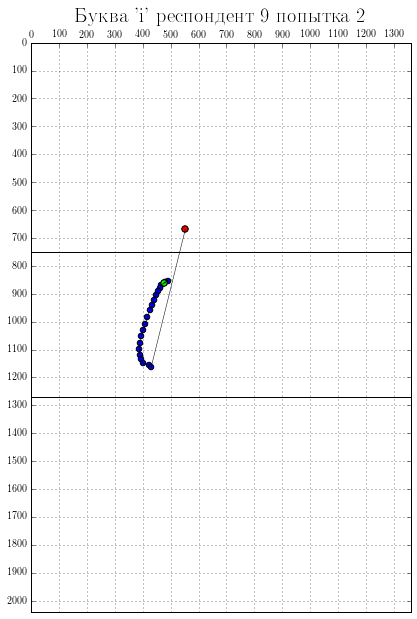

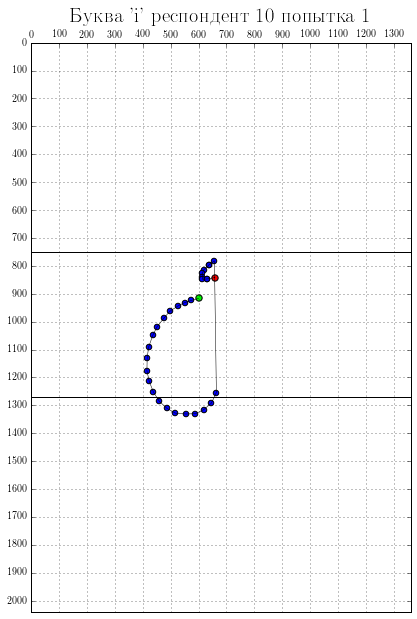

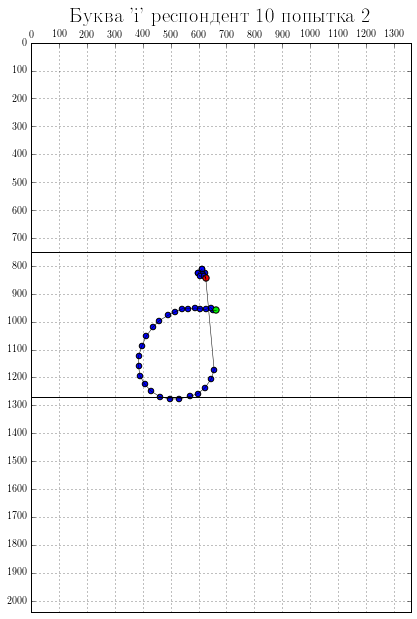

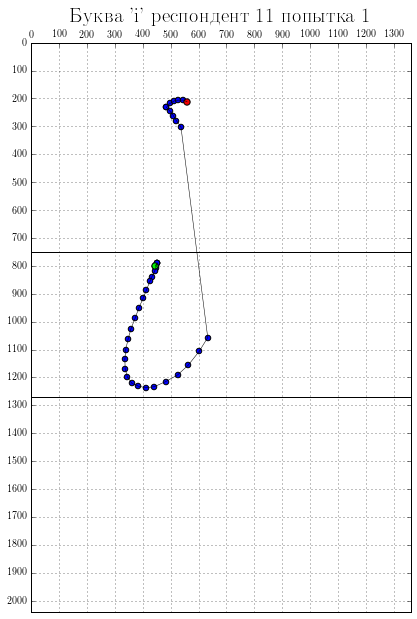

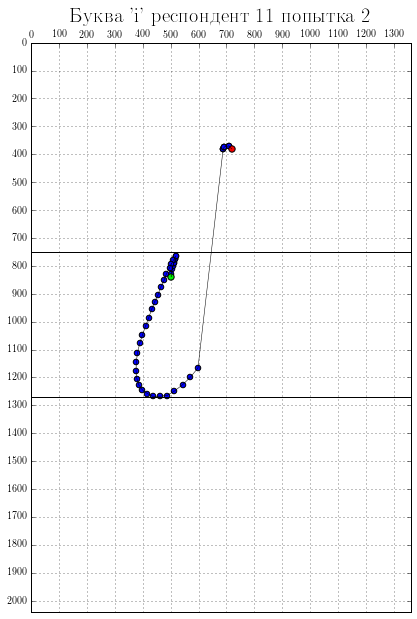

In [16]:
for writer in range(1, 11, 1):
    for repet in range(2):
        vis_letters((lexicon['i'], writer, repet), real_data)

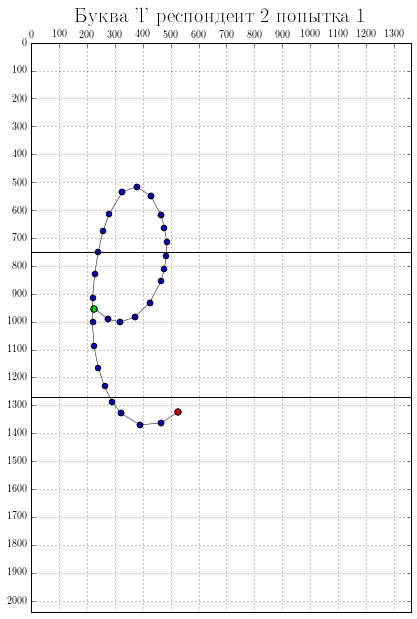

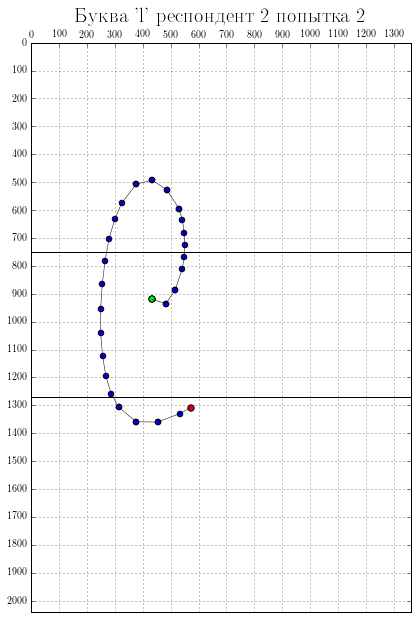

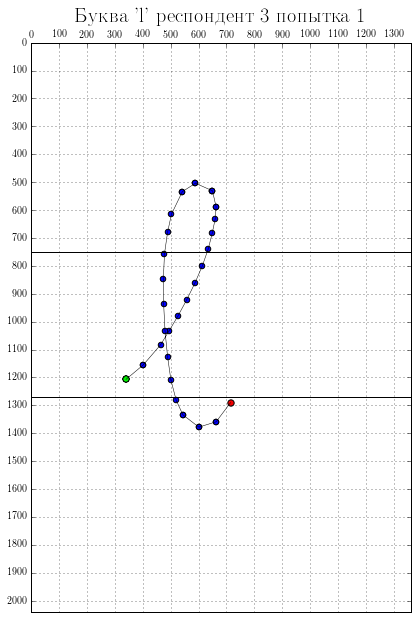

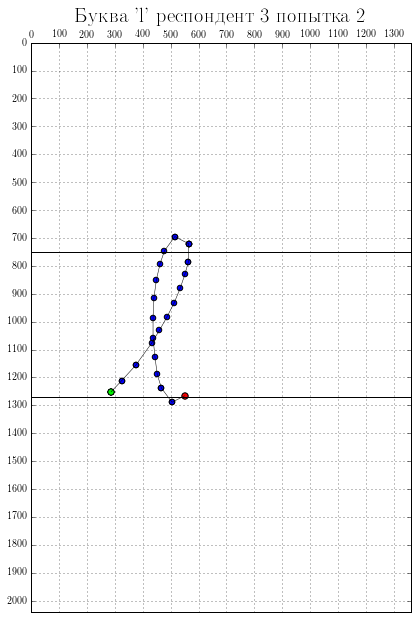

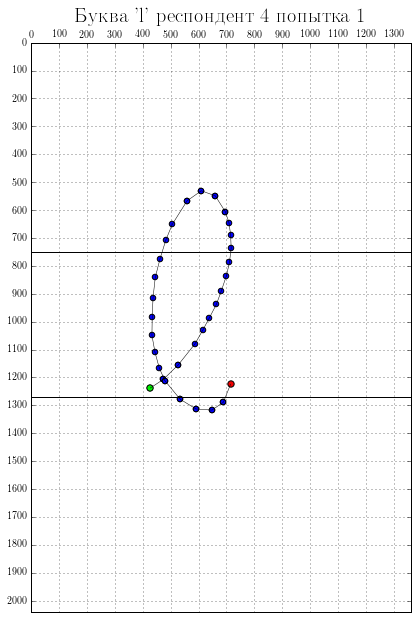

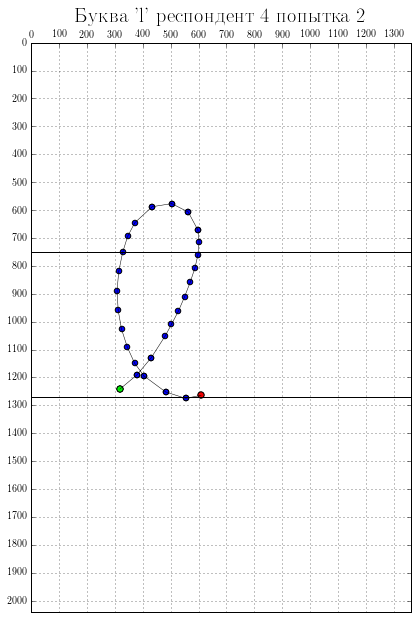

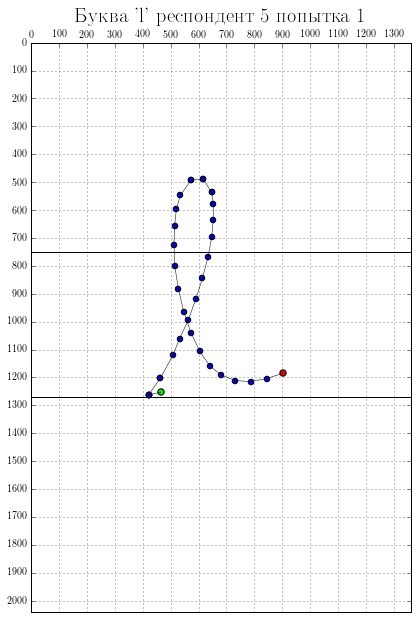

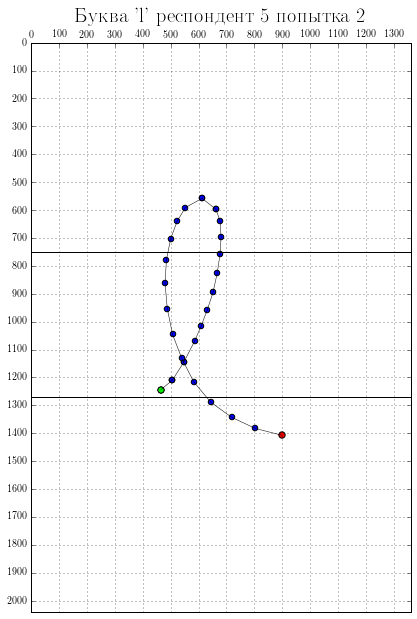

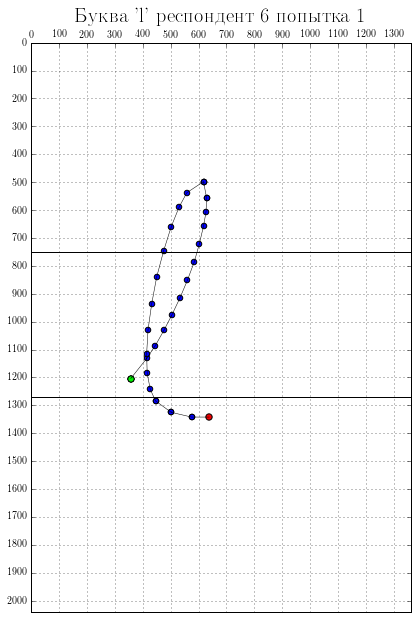

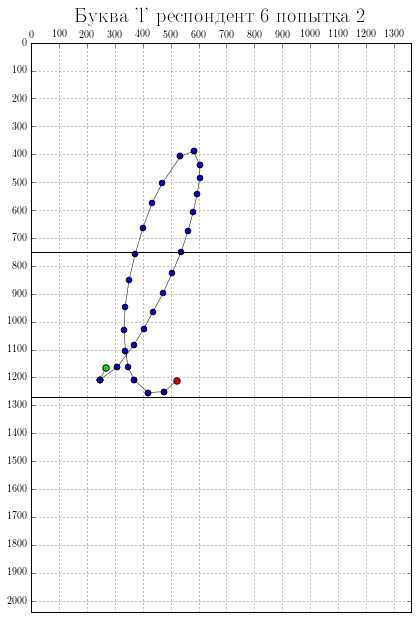

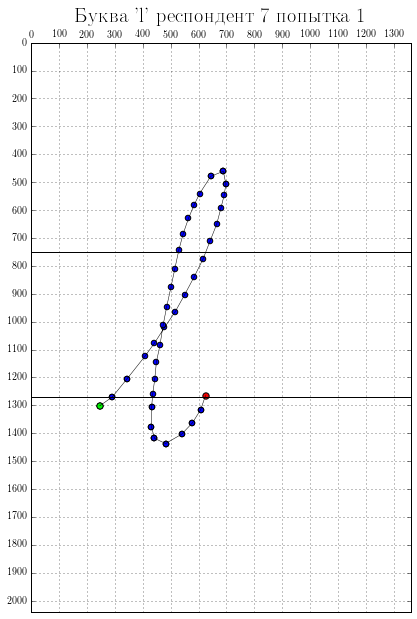

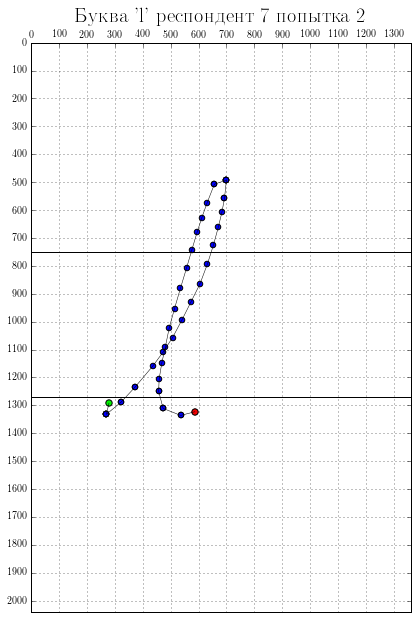

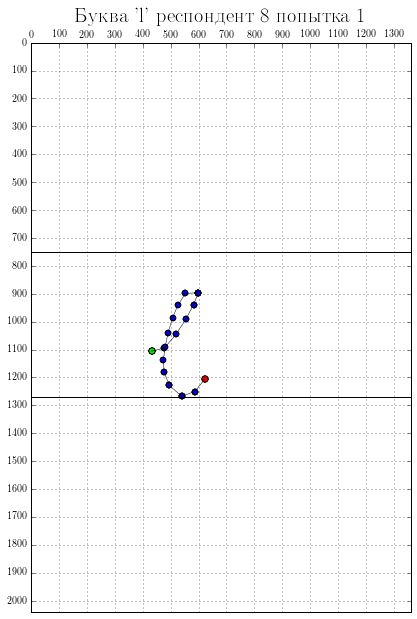

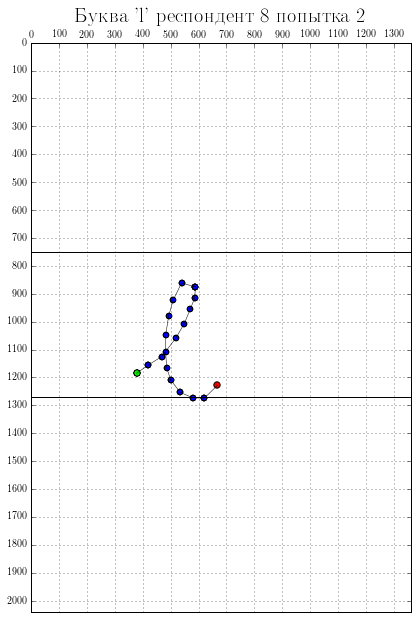

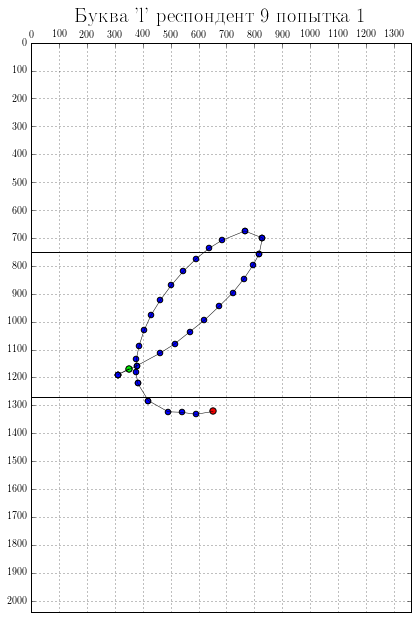

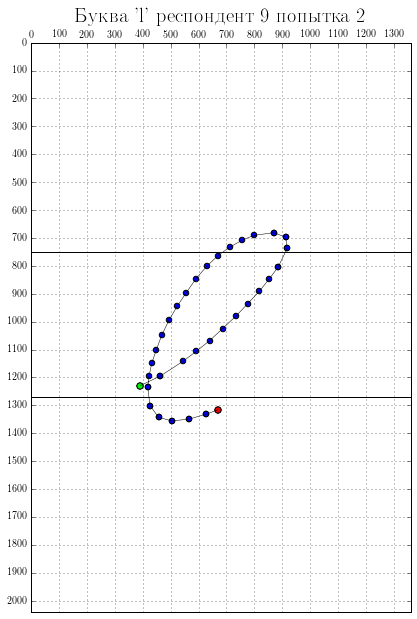

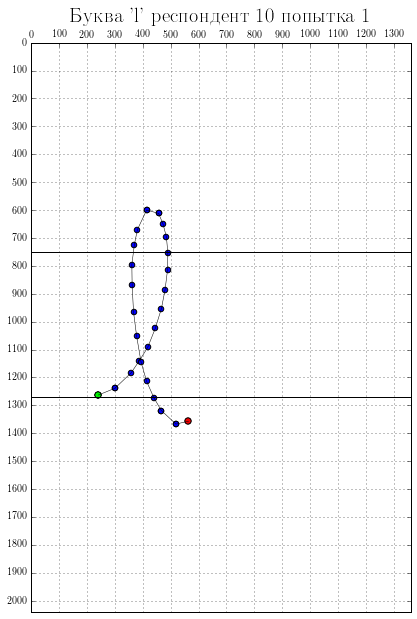

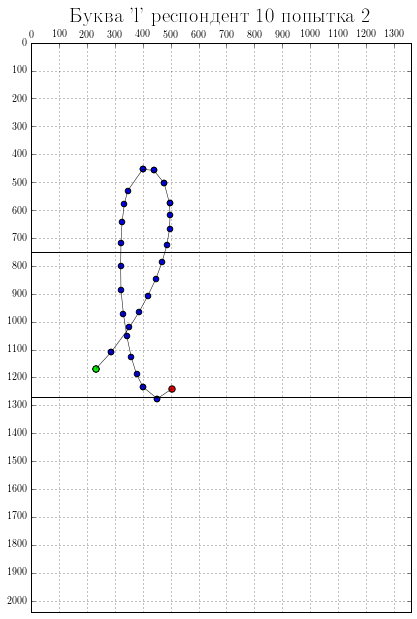

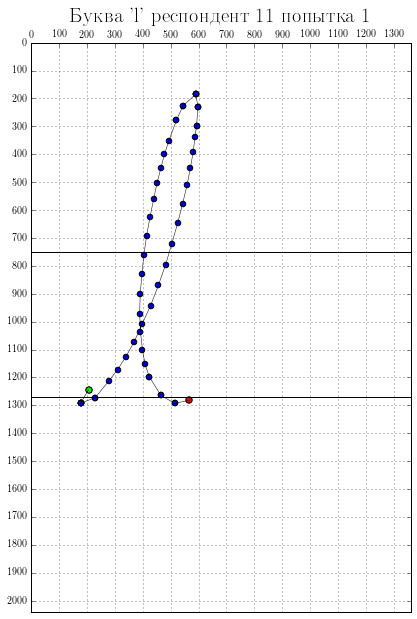

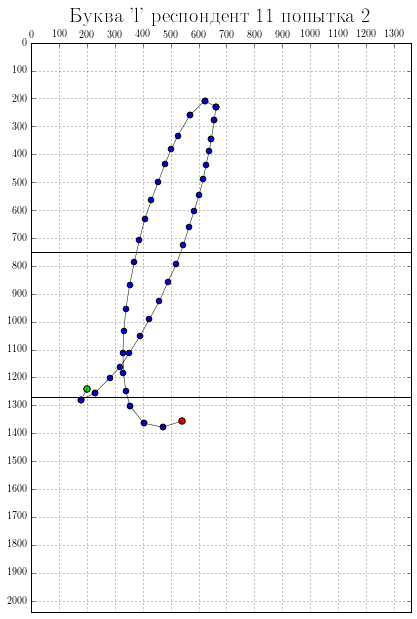

In [17]:
for writer in range(1, 11, 1):
    for repet in range(2):
        vis_letters((lexicon['l'], writer, repet), real_data)

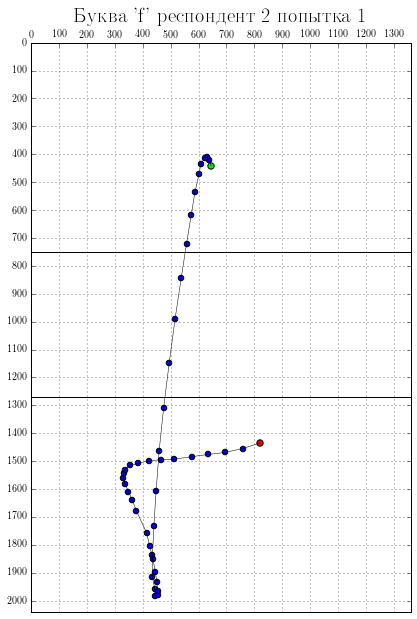

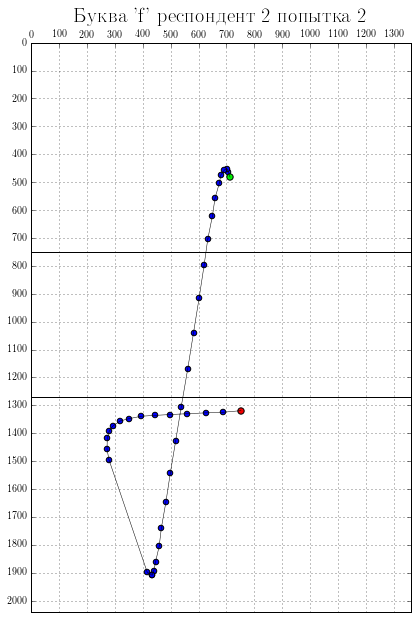

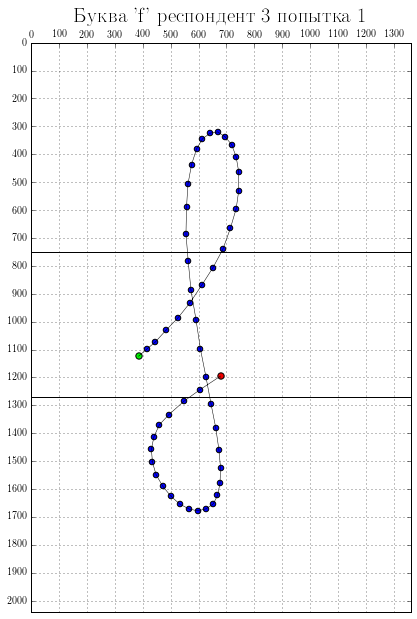

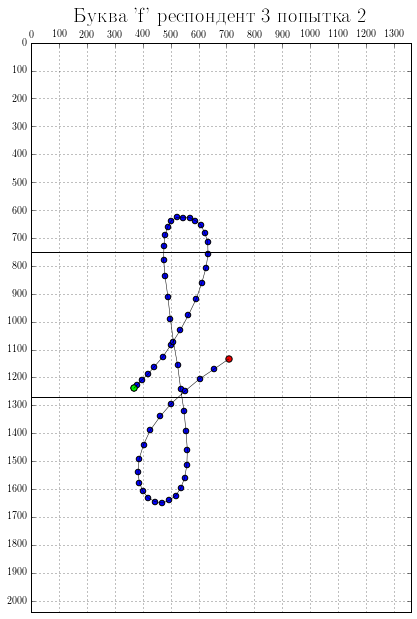

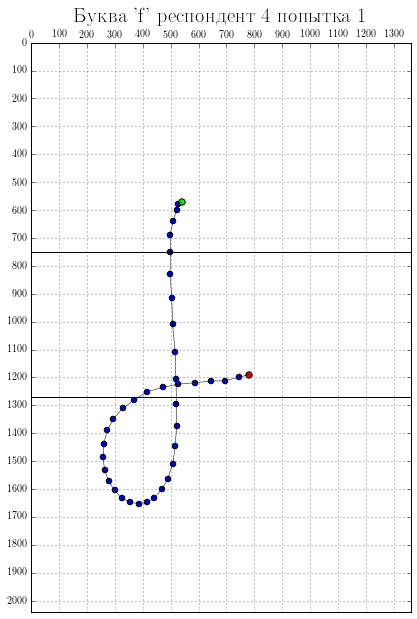

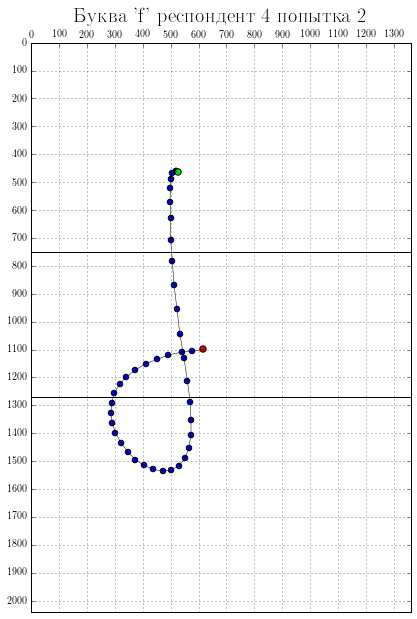

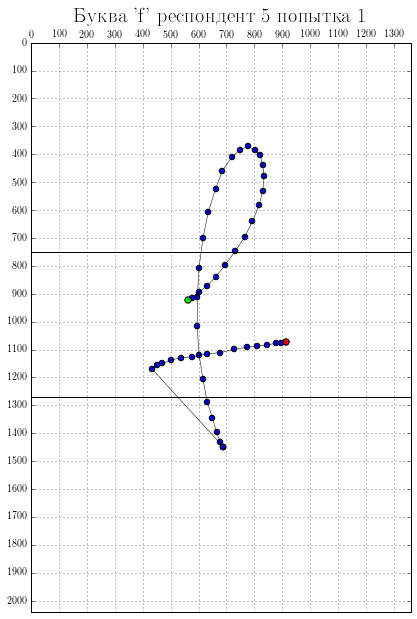

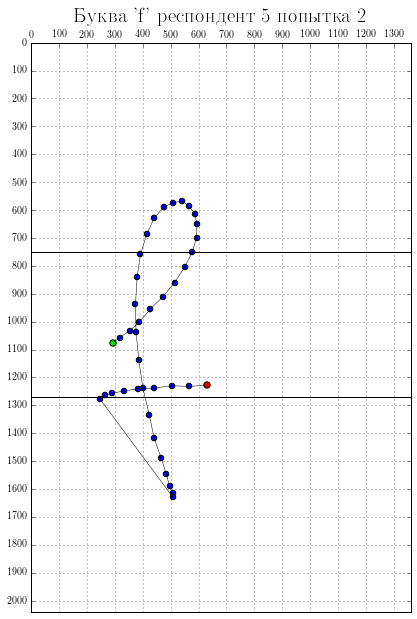

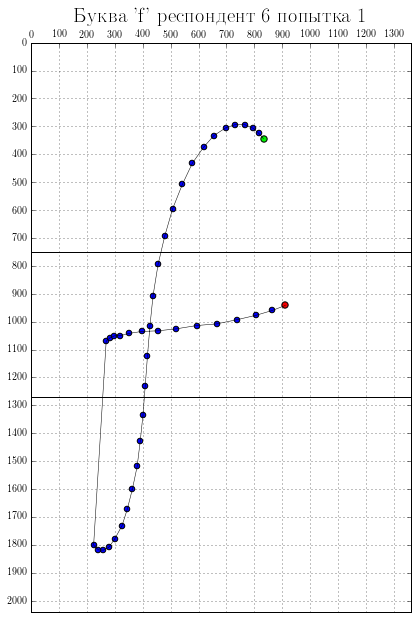

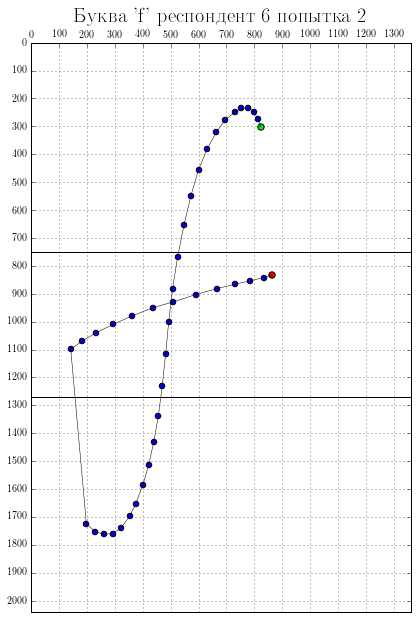

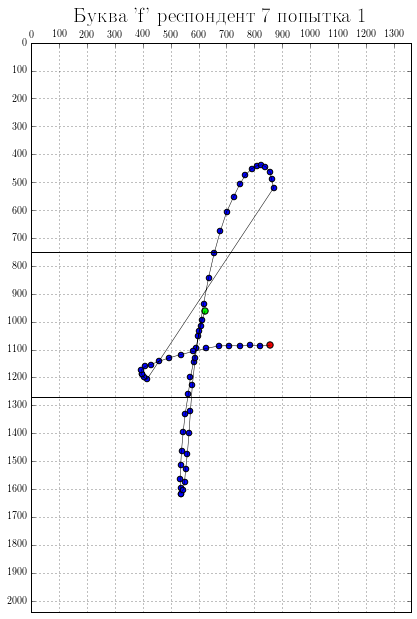

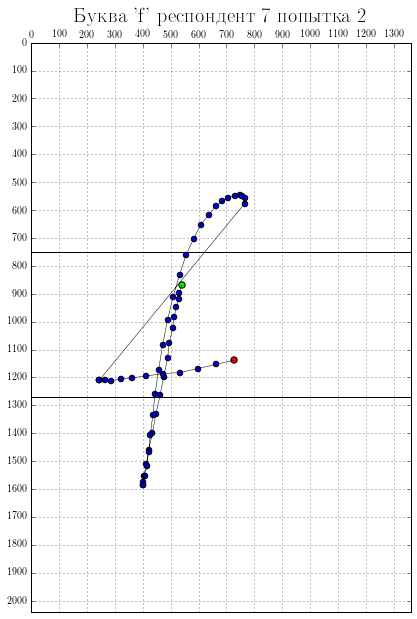

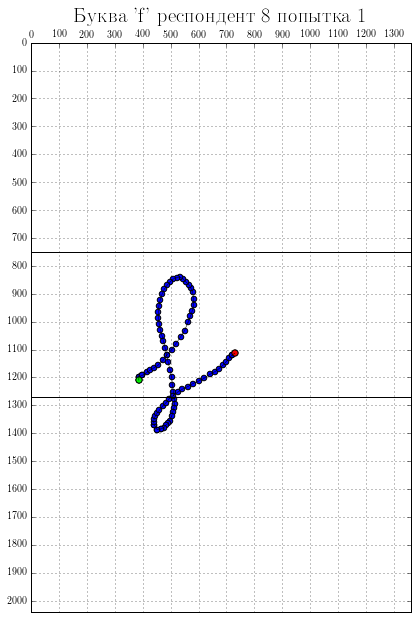

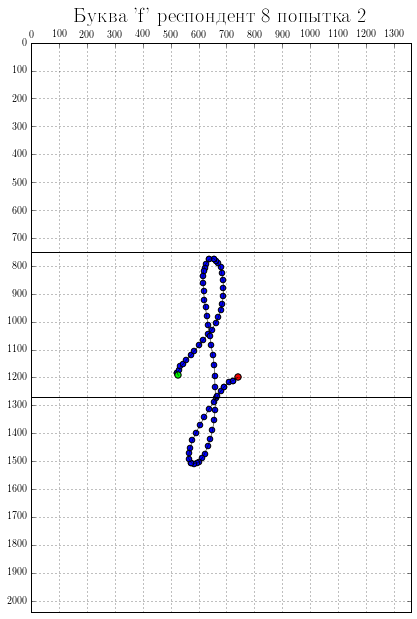

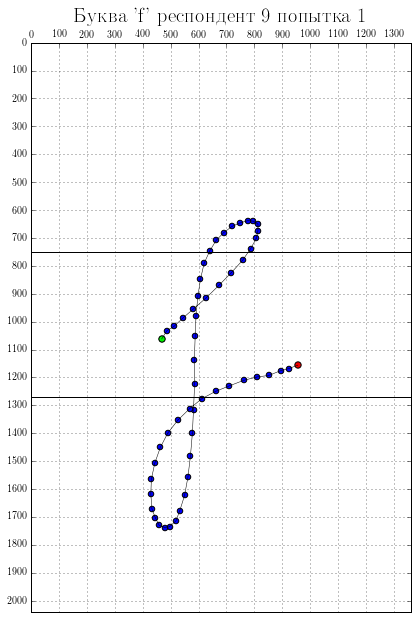

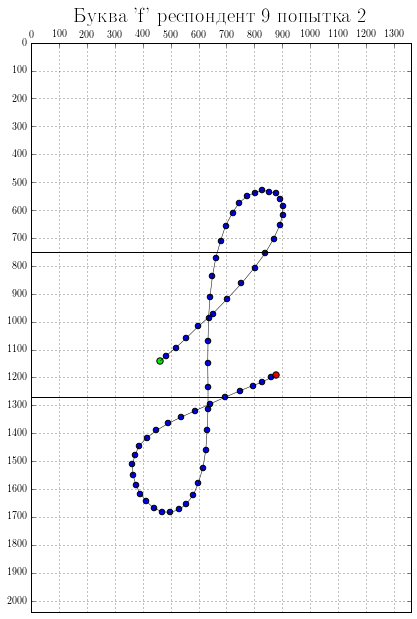

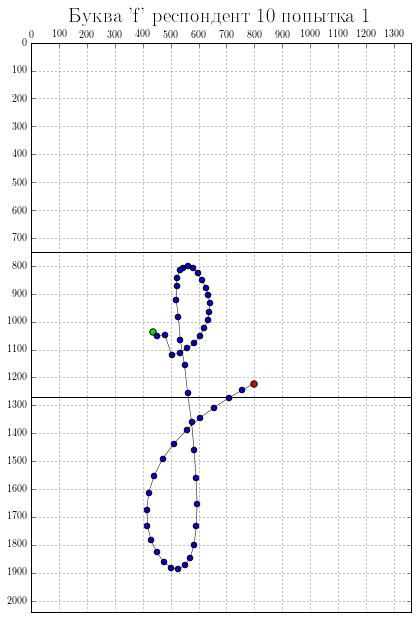

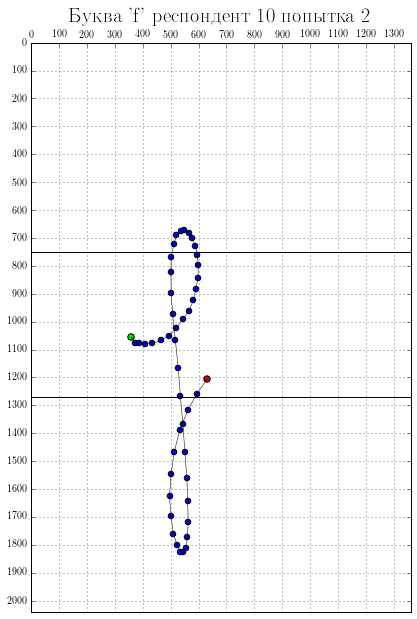

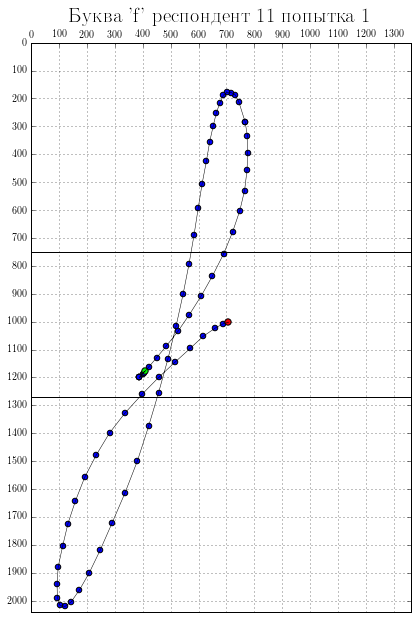

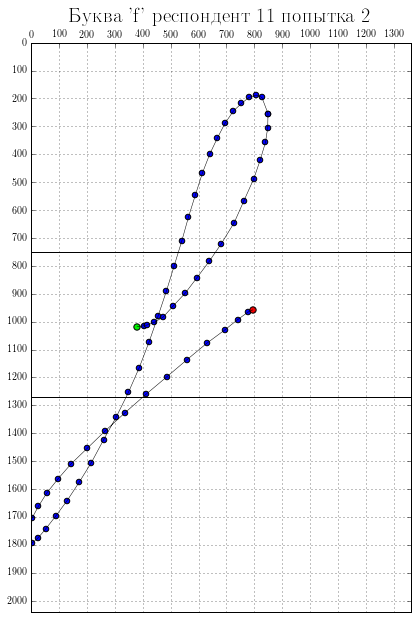

In [18]:
for writer in range(1, 11, 1):
    for repet in range(2):
        vis_letters((lexicon['f'], writer, repet), real_data)

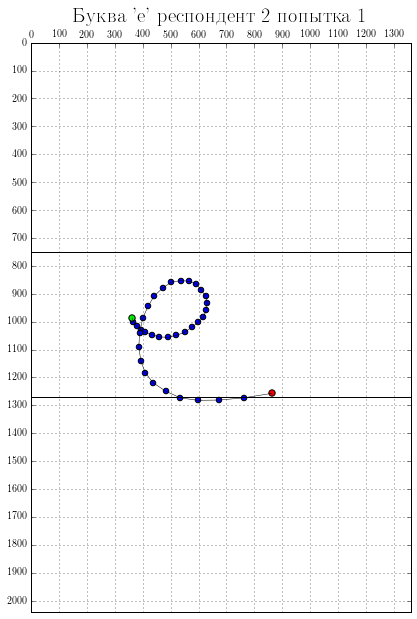

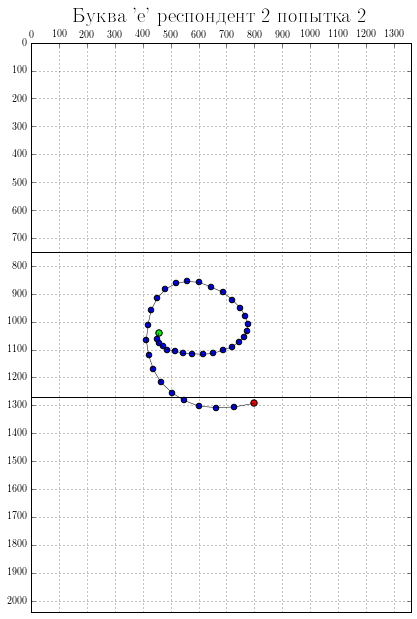

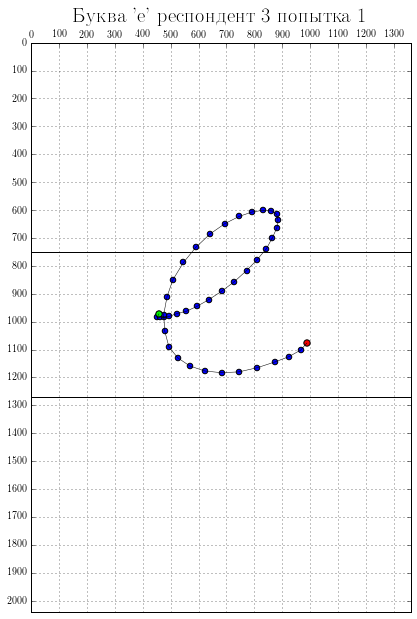

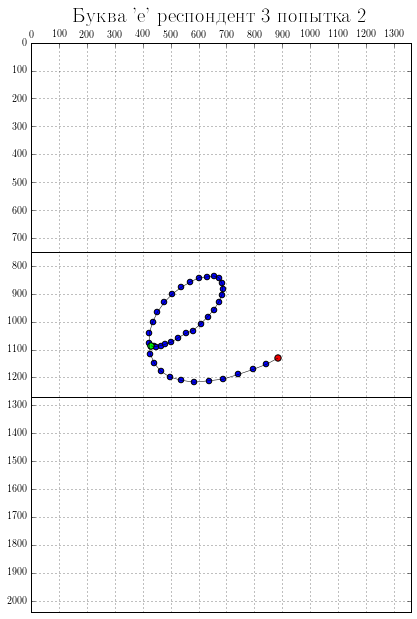

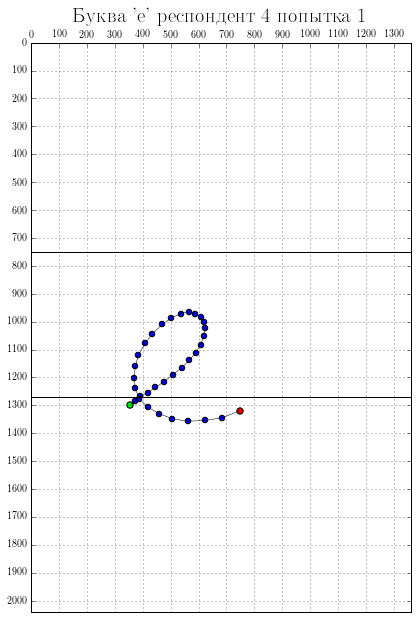

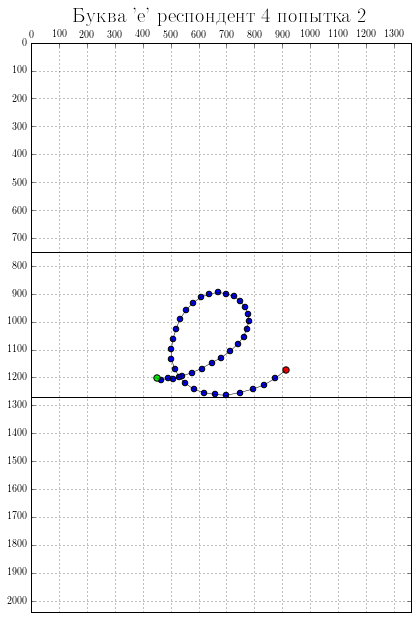

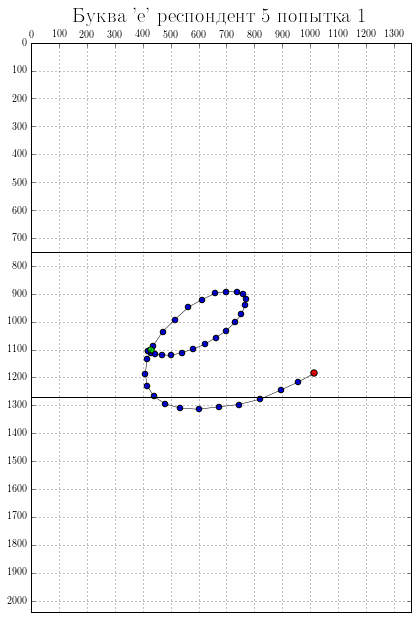

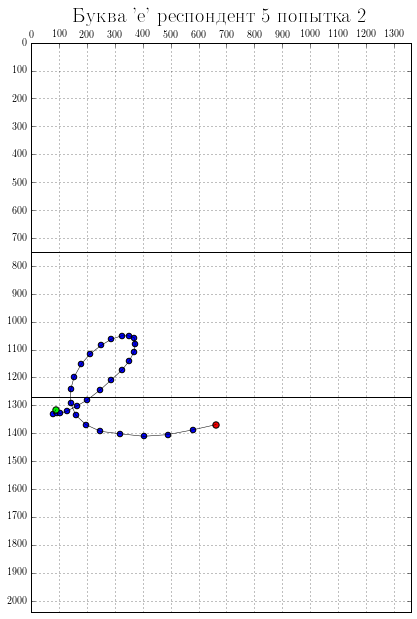

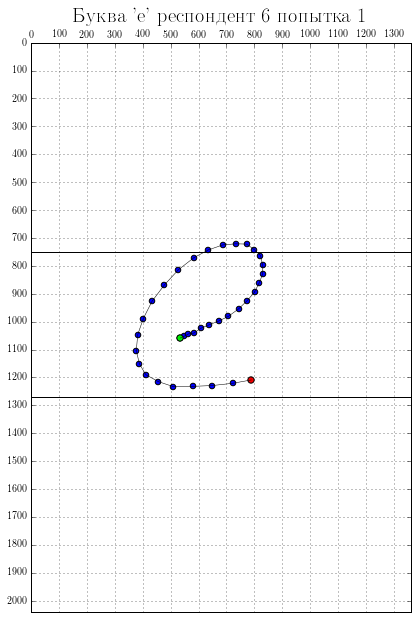

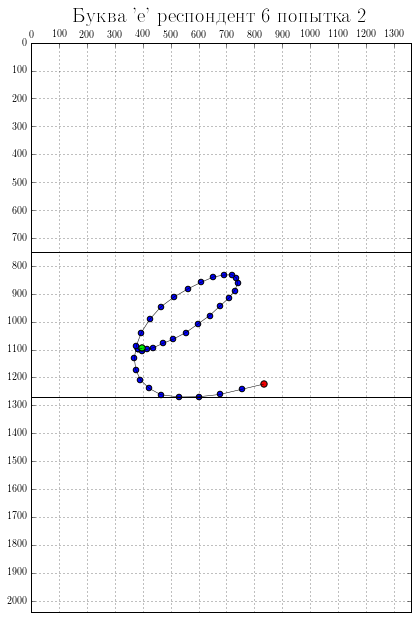

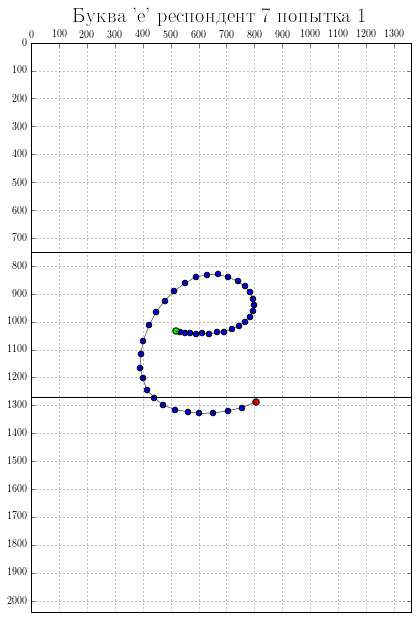

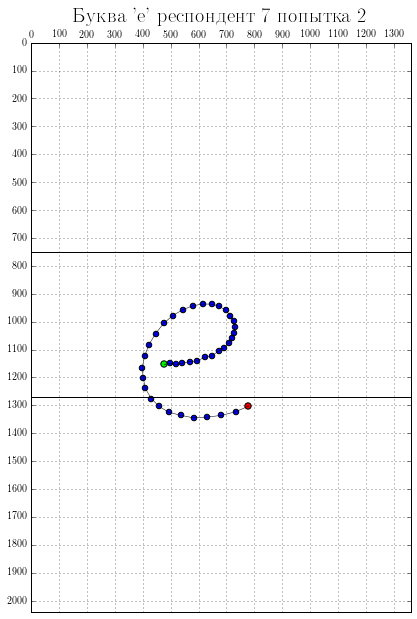

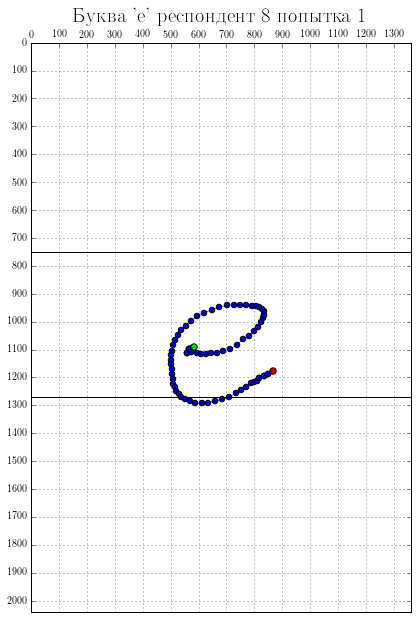

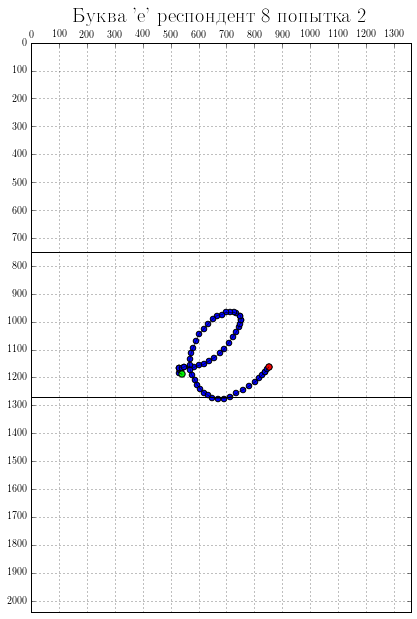

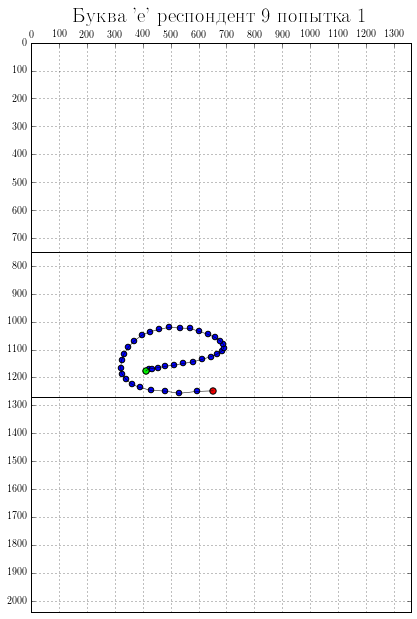

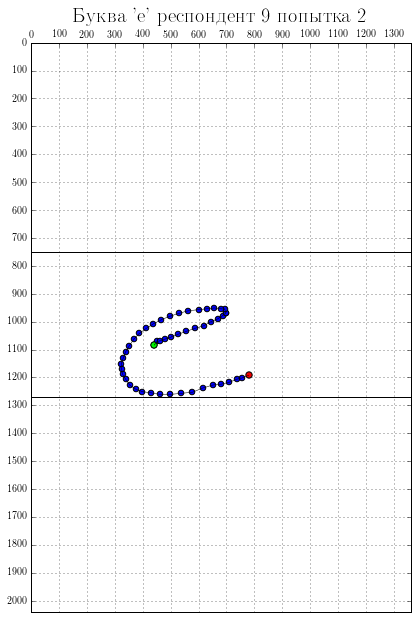

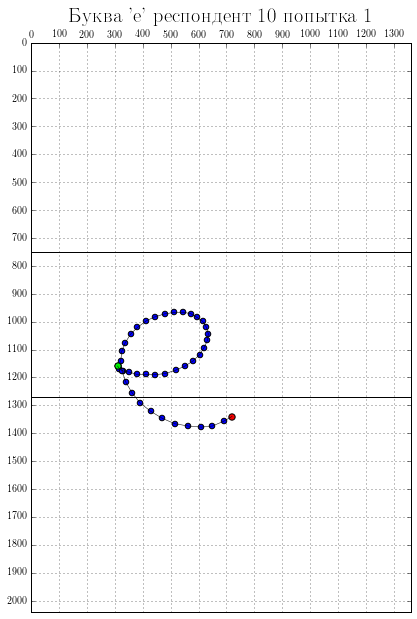

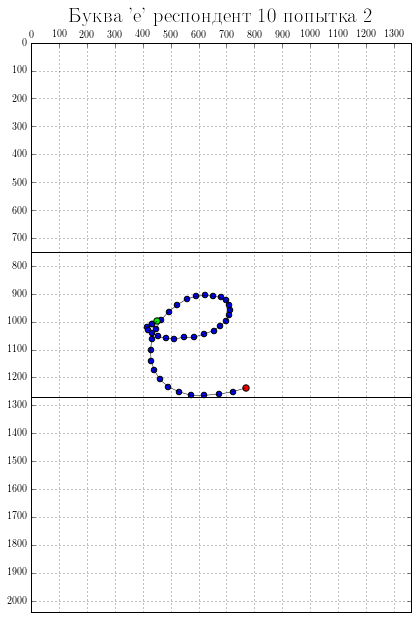

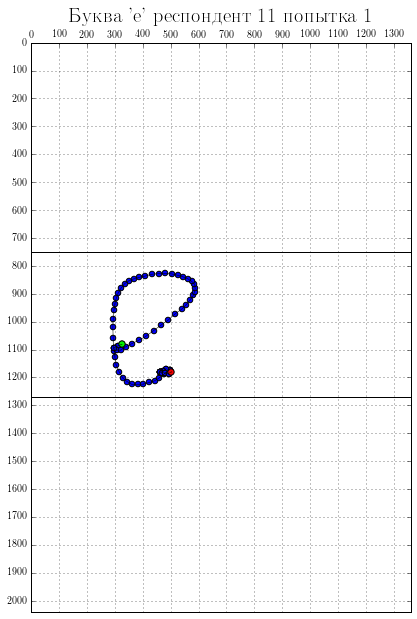

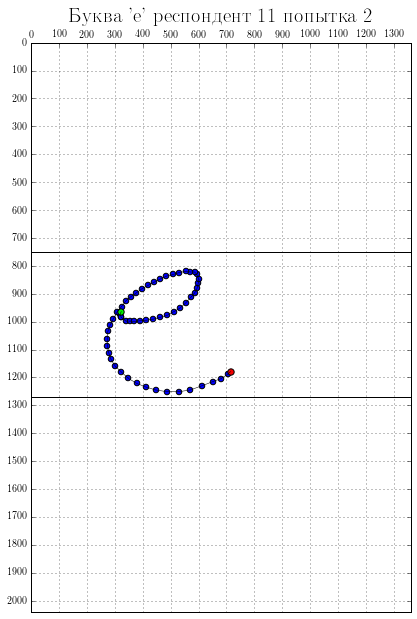

In [19]:
for writer in range(1, 11, 1):
    for repet in range(2):
        vis_letters((lexicon['e'], writer, repet), real_data)

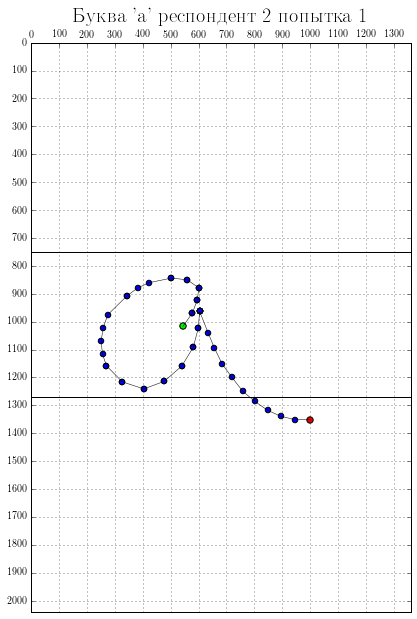

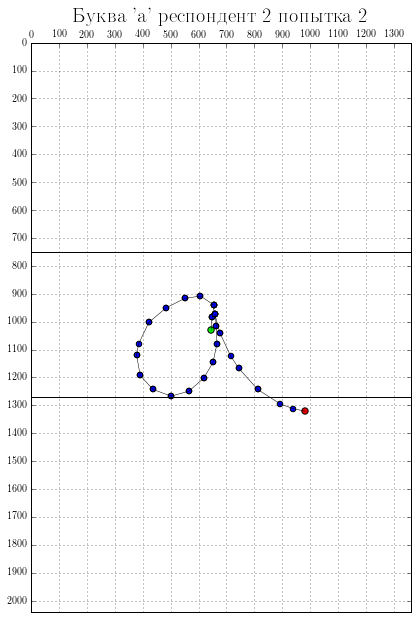

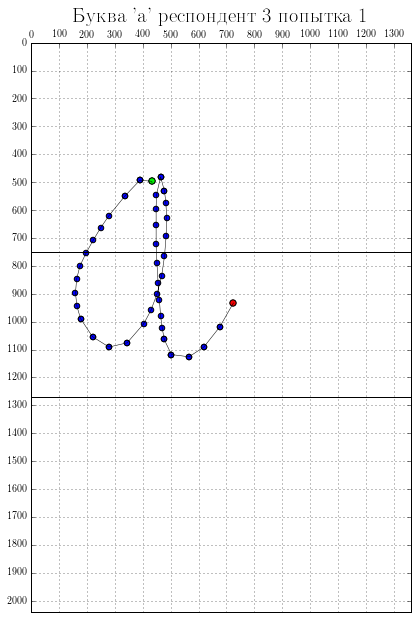

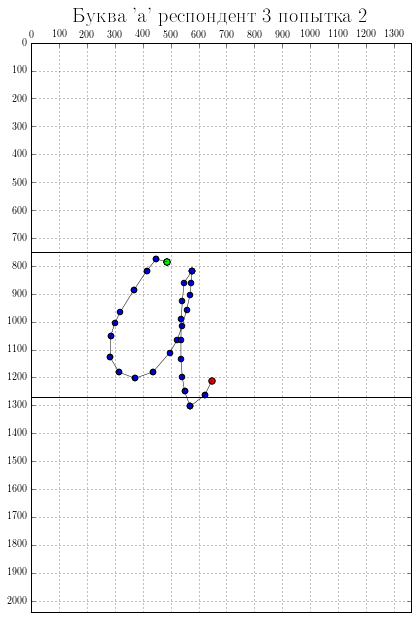

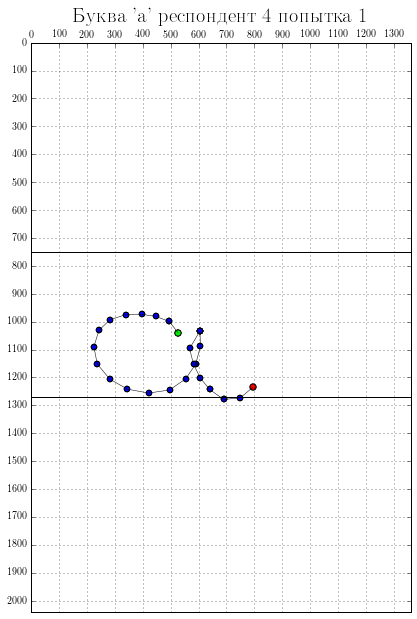

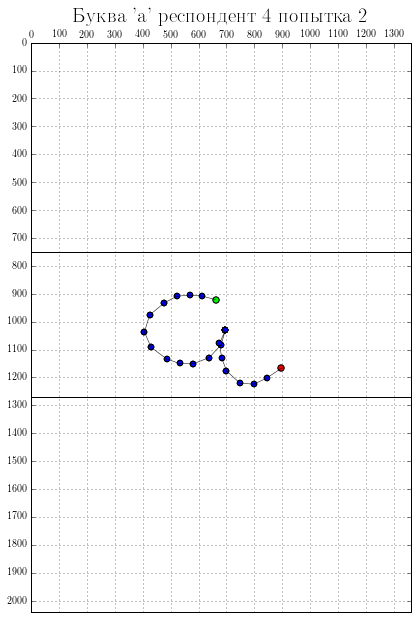

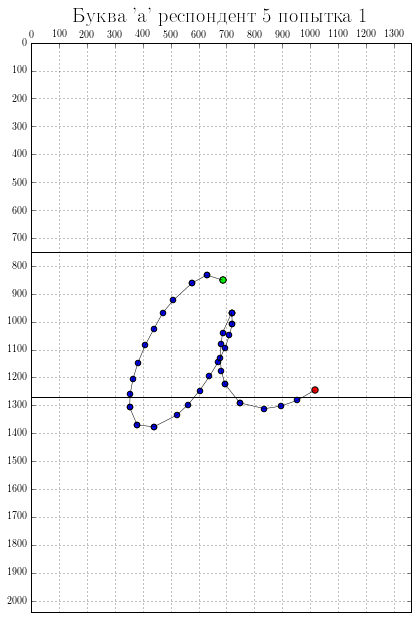

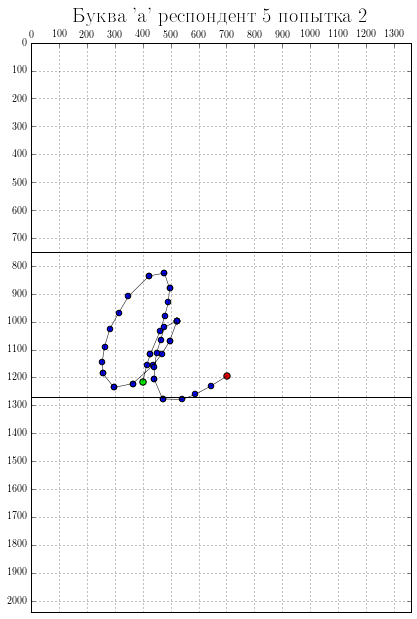

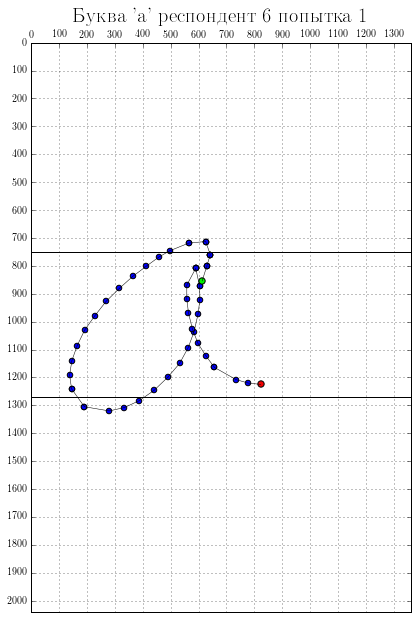

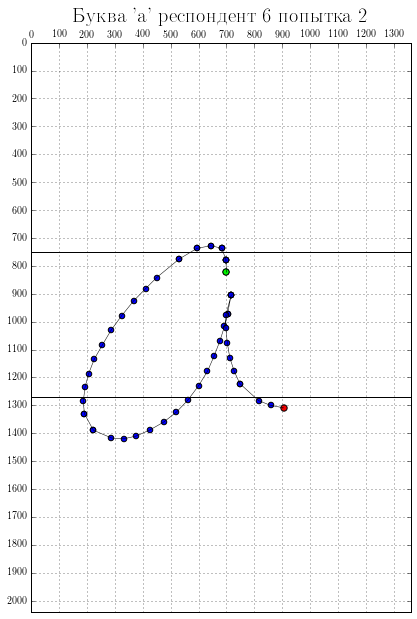

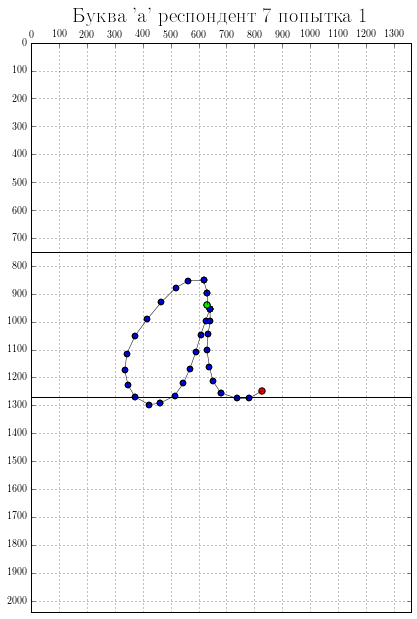

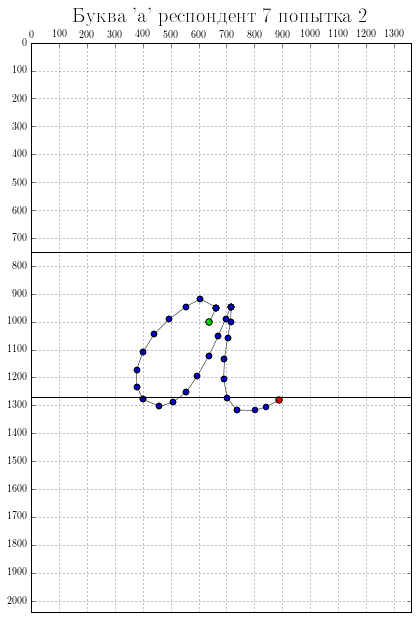

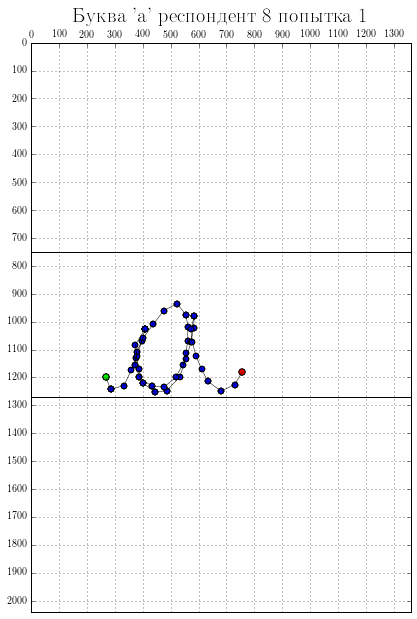

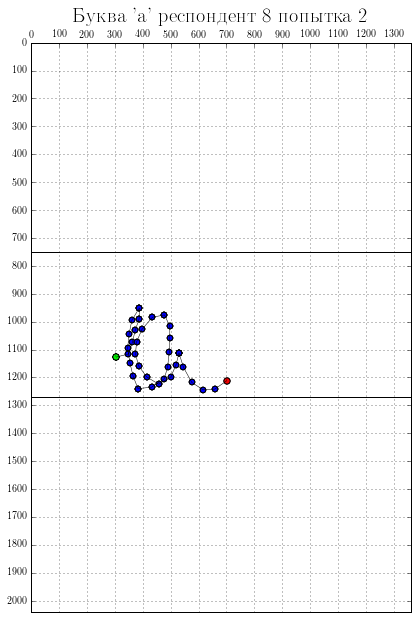

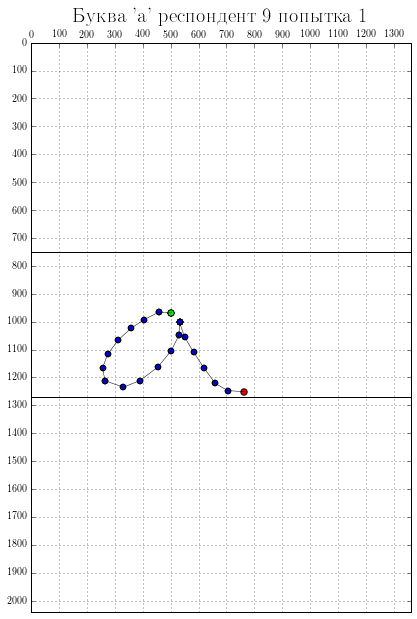

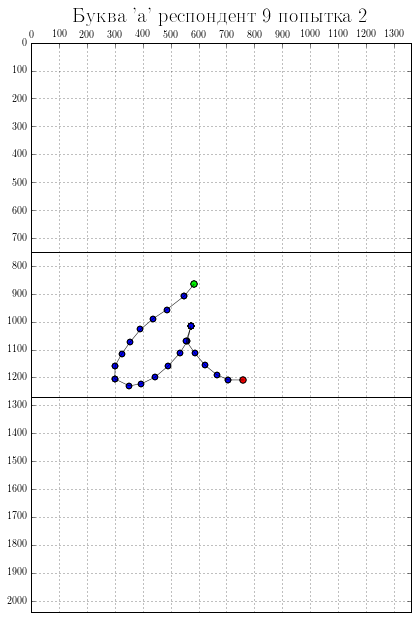

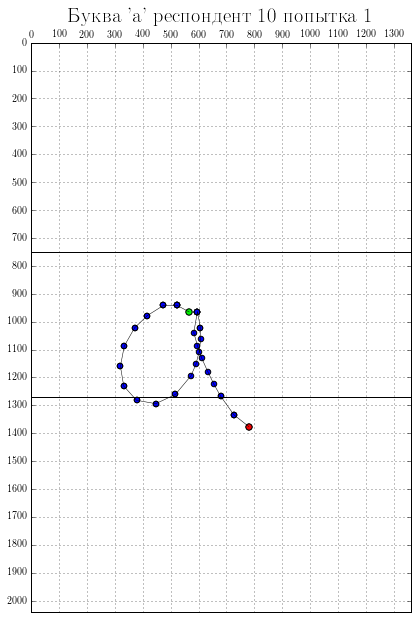

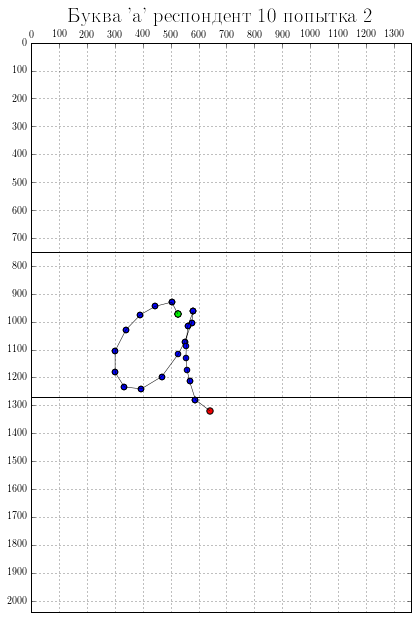

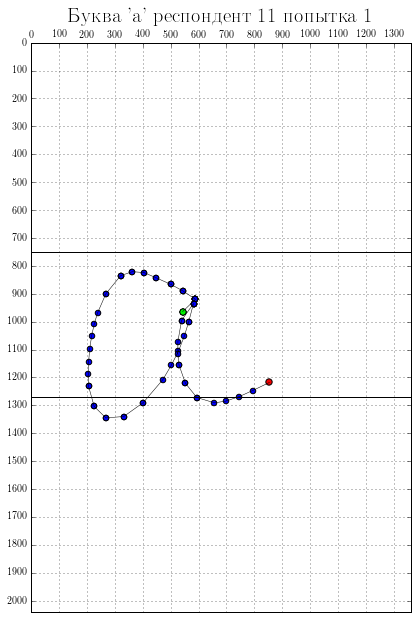

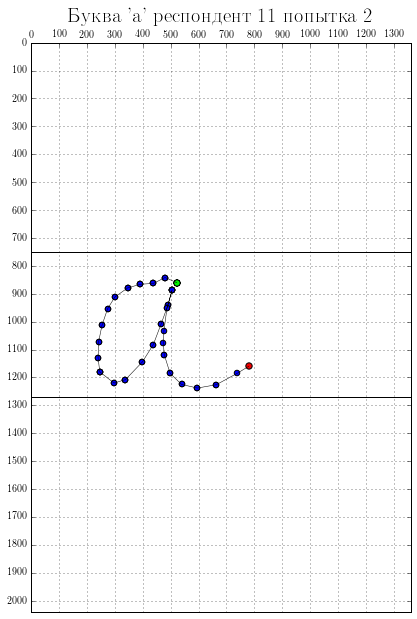

In [20]:
for writer in range(1, 11, 1):
    for repet in range(2):
        vis_letters((lexicon['a'], writer, repet), real_data)

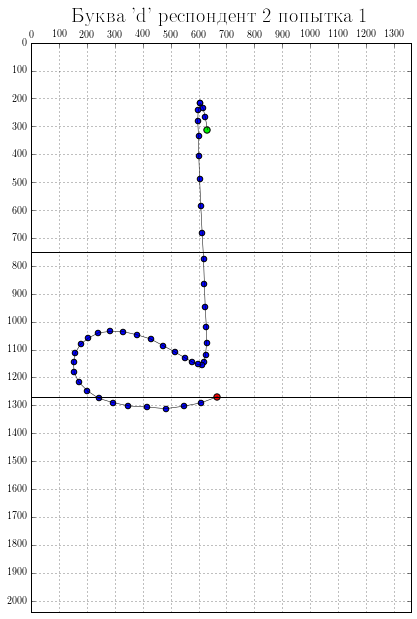

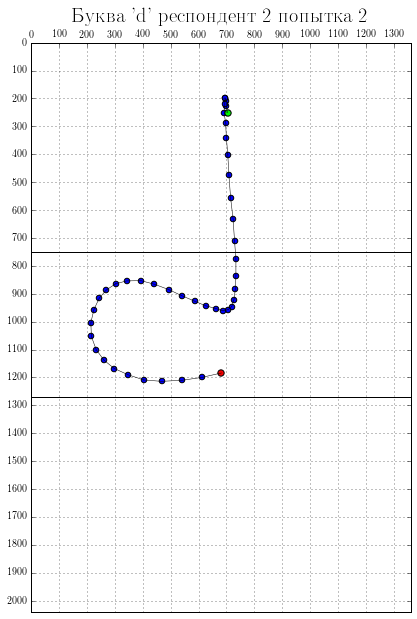

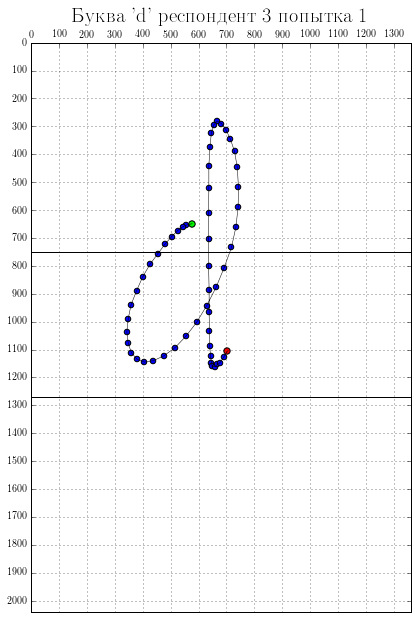

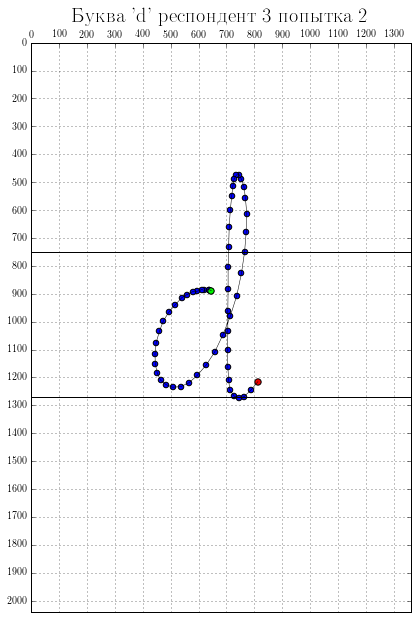

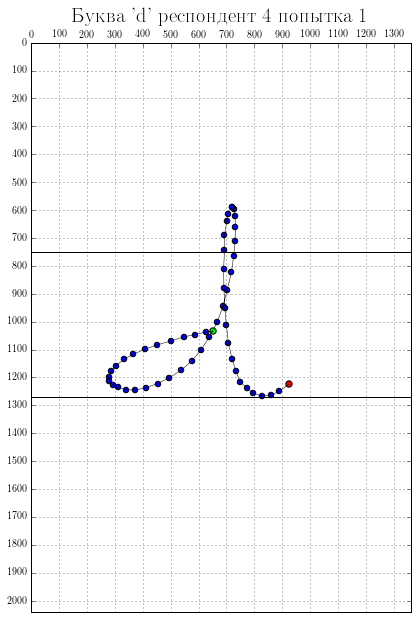

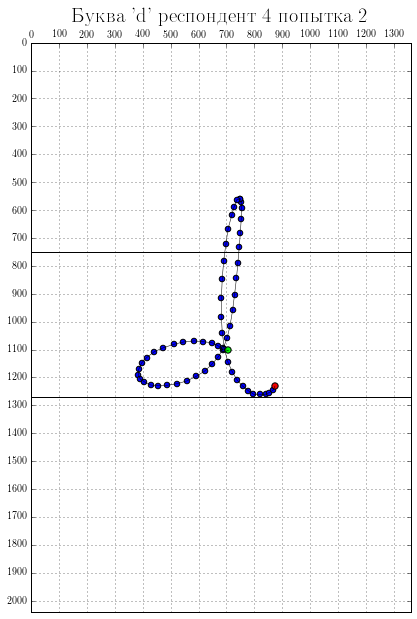

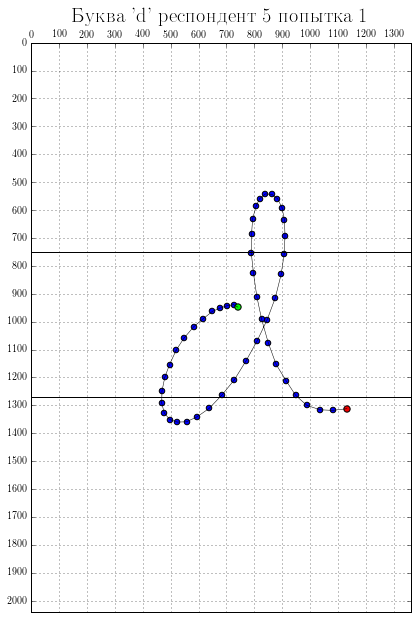

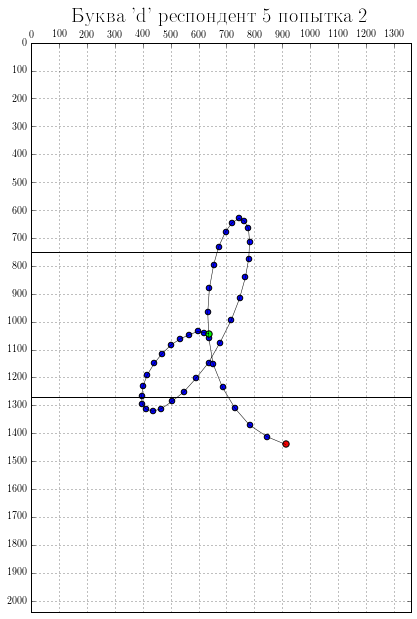

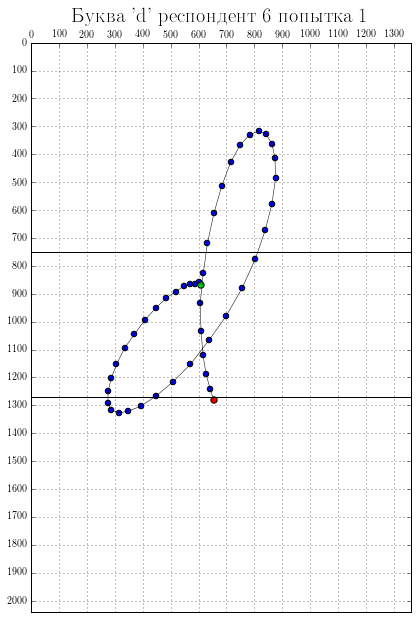

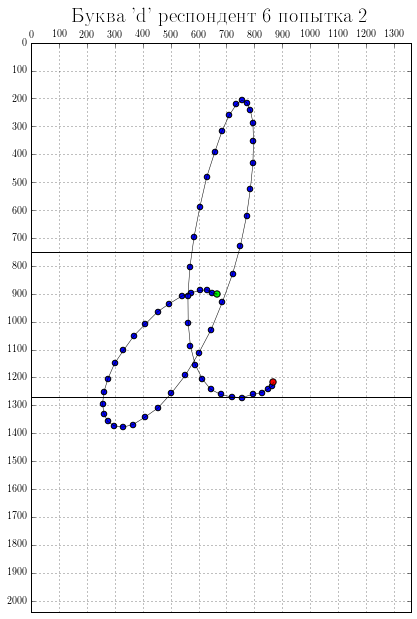

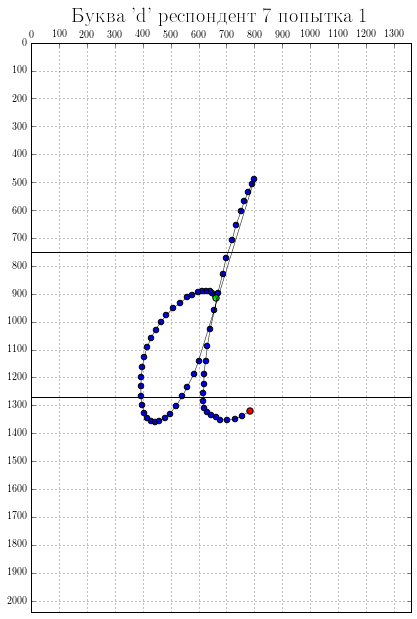

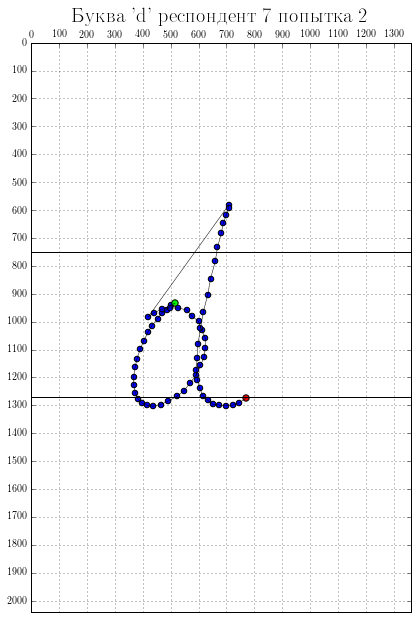

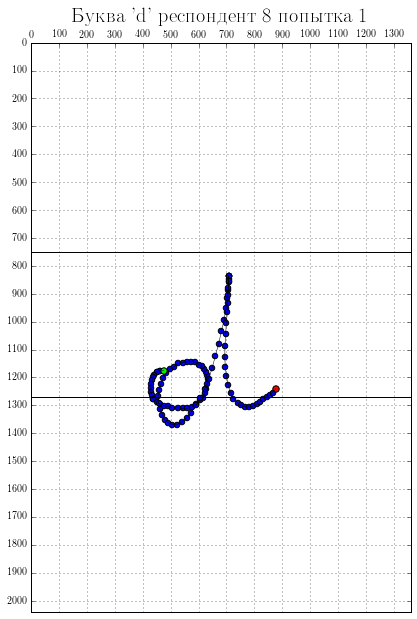

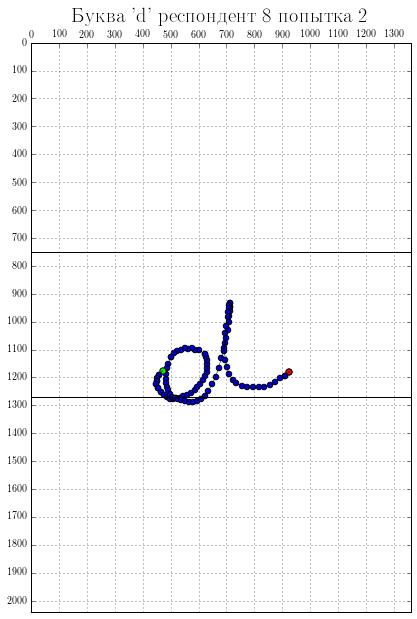

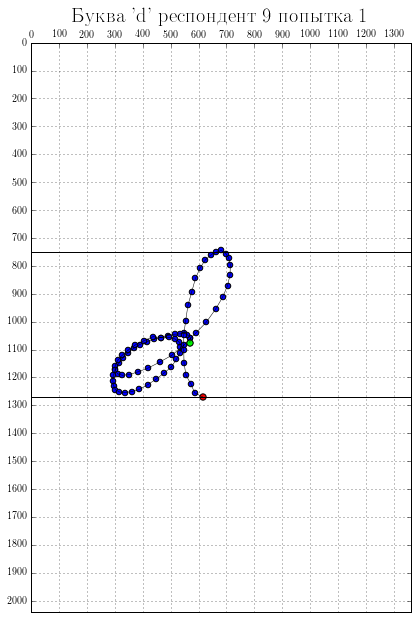

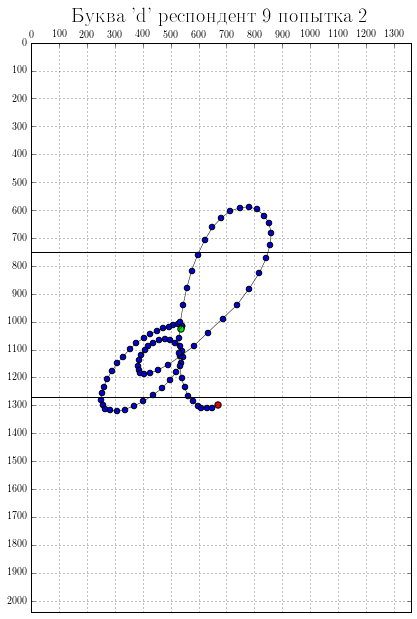

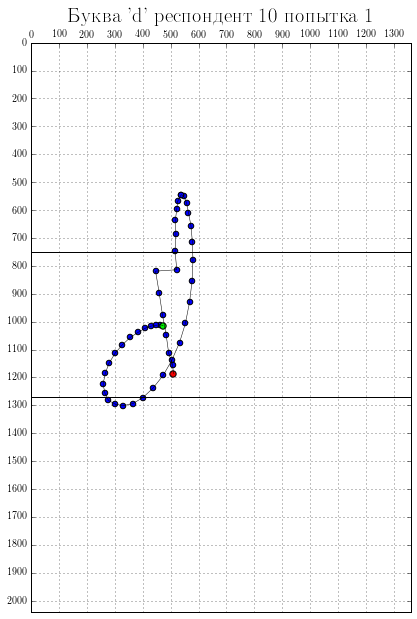

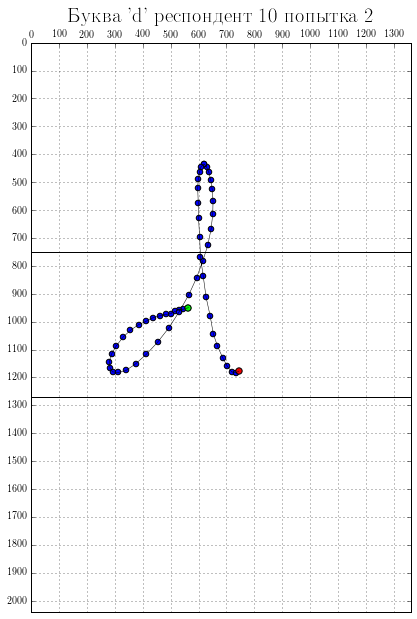

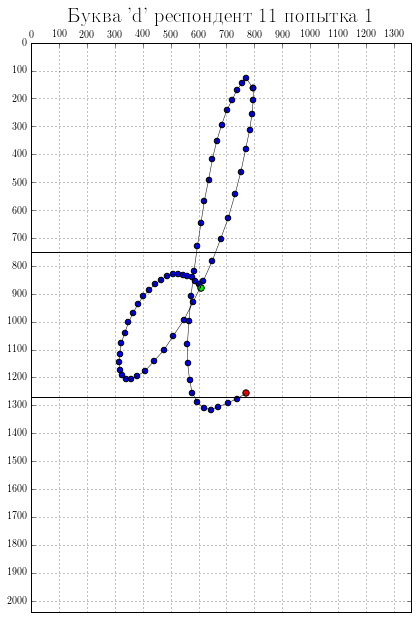

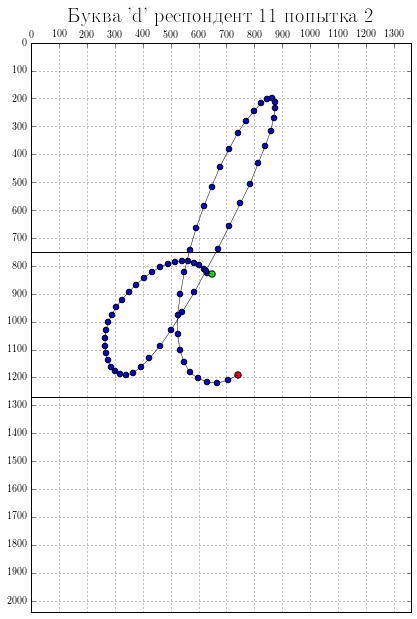

In [21]:
for writer in range(1, 11, 1):
    for repet in range(2):
        vis_letters((lexicon['d'], writer, repet), real_data)

## Making DTW preprocessing

In [99]:
ind = [(lexicon['y'], 2, 0), (lexicon['y'], 2, 1)]
a = trans_real_data[ind[0]].compressed().reshape(2, -1).T
b = trans_real_data[ind[1]].compressed().reshape(2, -1).T
%timeit dist, D = sigproc.dtw(a, b, do_path=False)

10 loops, best of 3: 64.8 ms per loop


In [89]:
def test(real_data, index_list):
    for ind in index_list:
        a = real_data[ind[0]].compressed().reshape(2, -1).T
        b = real_data[ind[1]].compressed().reshape(2, -1).T
        tm = time.time()
        dist, D = sigproc.dtw(a, b, do_path=False)
        tm = time.time() - tm;
        print("Буква '{0:s}'\tреспондент {1:d}\tпопытка 0 и 1: \t{2:.3f}".format(
                anti_lexicon[ind[0][0]], ind[0][1] + 1, dist))
        print("Время: {} сек".format(tm))

In [98]:
index_list = [[(lexicon['y'], wr-1, 0), (lexicon['y'], wr-1, 1)] for wr in [2, 22,32]]
test(trans_real_data_full, index_list)

Буква 'y'	респондент 2	попытка 0 и 1: 	3.289
Время: 0.09904766082763672 сек
Буква 'y'	респондент 22	попытка 0 и 1: 	1.601
Время: 0.06021428108215332 сек
Буква 'y'	респондент 32	попытка 0 и 1: 	1.217
Время: 0.03963112831115723 сек


In [92]:
index_list = [[(lexicon['y'], wr-1, 0), (lexicon['y'], wr-1, 1)] for wr in [2, 22,32]]
test(trans_real_data_full, index_list)

Буква 'y'	респондент 2	попытка 0 и 1: 	3.289
Буква 'y'	респондент 22	попытка 0 и 1: 	1.601
Буква 'y'	респондент 32	попытка 0 и 1: 	1.217


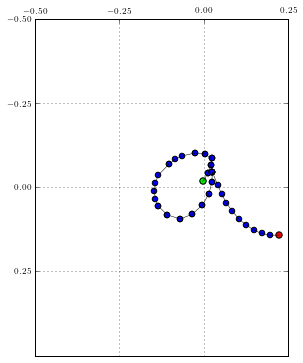

In [127]:
ind = (lexicon['a'], 1, 0)
#vis_letters(ind, real_data_full, figsize=frame_size/3)
vis_letters_trans(ind, trans_real_data, figsize=frame_size/3)

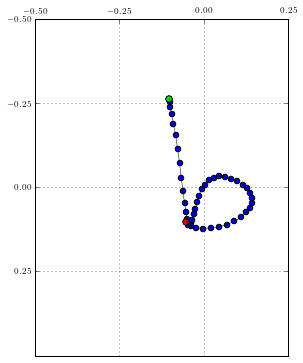

In [128]:
ind = (lexicon['b'], 1, 1)
#vis_letters(ind, real_data_full, figsize=frame_size/3)
vis_letters_trans(ind, trans_real_data, figsize=frame_size/3)

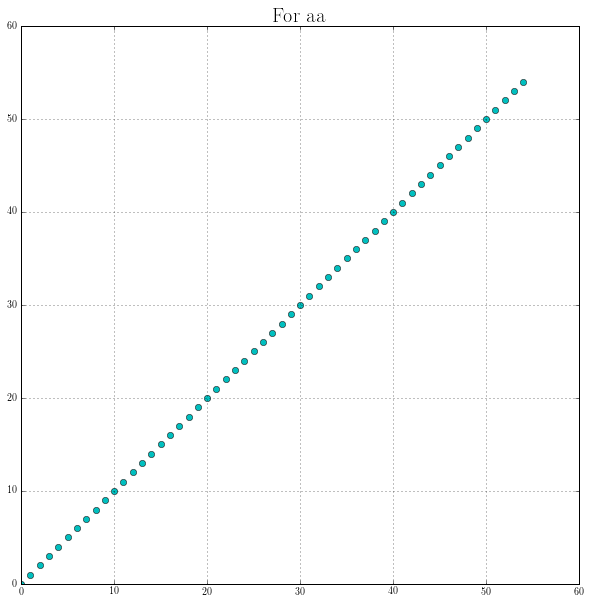

In [134]:
ind = (lexicon['a'], 1, 0), (lexicon['f'], 1, 1)
a = trans_real_data[ind[0]].compressed().reshape(2, -1).T
b = trans_real_data[ind[0]].compressed().reshape(2, -1).T
dist, path, D = sigproc.dtw(a, b, do_path=True)
pr_path(path, 'aa')

In [122]:
def pr_path(path, name):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.gca()
    ax.set_aspect('equal')
    ax.grid()
    ax.plot(path[:, 0], path[:, 1], 'co')
    ax.set_title("For " + name, fontsize=20)

### 2) Эксперименты, сравнение символов

Train/Test experiment in letter comparison: divided by repetitions

In [49]:
def Letter_compare_predictions(real_data, letter_comparison, fines, alphas, d, Dist=None, a=False, l_need=None):
    """Train/Test experiment: divided by repetitions
       Dist - the whole matrix of distances
    """
    global lexicon
    models_pred = np.empty((letter_comparison.shape[0], alphas.size,
                            real_data.shape[1]*real_data.shape[2]), dtype=np.str)
    #print(type(models_pred))
    compare_cnt = 0
    N_wr = real_data.shape[1]
    for l1, l2 in letter_comparison:
        #Training
        st1 = lexicon[l1]*11*2; st2 = lexicon[l2]*11*2
        ind = list(range(st1, st1+22)) + list(range(st2, st2+22))
        smDist = Dist[np.ix_(ind, ind)]
        X_train = real_data[[lexicon[l1], lexicon[l2]], :N_wr, 0].reshape(-1, 2, max_d)
        y_train = np.ones((X_train.shape[0],1))
        y_train[X_train.shape[0]//2:] = -1
        #B = sigproc.m_distance_features(X_train, fines=fines) 
        linear_models = [svm.smooth_qp_primal_real_solver(X_train, y_train, fines, gamma=1, alpha=alpha, Dist=smDist[::2, ::2], d=d)
                             for alpha in alphas]
        if l_need is None:
            l_need = l1
        if a and l1 == l_need:
            return [linear_models[i]['a'].T for i in range(alphas.size)]#[linear_models[0]['a'].T, linear_models[25]['a'].T, linear_models[75]['a'].T]
        #Testing
        X_test = real_data[[lexicon[l1], lexicon[l2]], :N_wr, 1].reshape(-1, 2, max_d)
        y_test = np.ones((X_test.shape[0],1))
        y_test[X_test.shape[0]//2:] = -1
        for model_i in range(len(linear_models)):
            model = linear_models[model_i]
            pred = svm.predict(X_test, 'real', 'primal', model['a'], model['b'], X_train, y_train, fines, d=d, Dist=smDist[1::2, ::2])
            models_pred[compare_cnt, model_i, (pred==1).ravel()] = l1
            models_pred[compare_cnt, model_i, (pred==-1).ravel()] = l2
        compare_cnt += 1
    return np.array(models_pred)

In [32]:
with change_printopt(threshold=1000):
    print(Result_full_low2_corp[:, 0, 0])

['a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'k' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'a' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'l' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'f' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'g' 'h' 'h' 'h' 'h' 'h' 'h' 'h' 'h' 'h' 'h' 'h' 'h' 'h' 'h' 'h' 'h' 'h' 'h' 'h' 'h' 'h' 'h' 'h' 'h' 'h' 'h' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'j' 'j' 'j' 'j' 'j' 'j' 'j' 'j' 'j' 'j' 'j' 'j' 'j' 'j' 'j' 'r'

In [60]:
intervals = np.append(np.linspace(0, 1, num=51), np.linspace(5, 105, num=51))
fines = np.array([0, 0, 0])

compare_arr1 = np.array([['i', 'l'], ['f', 'e'], ['a', 'd']])

compare_arr2 = np.array([['i', 'j'], ['c', 'e'],
                ['u', 'y'], ['h', 'b'], ['h', 'n'],
                ['j', 'y'], ['f', 'y'],
                ['a', 'o'], ['g', 'y'], 
                ['o', 'v'], ['l', 't']])

bad_low = np.append(keys_low_letters[1:],np.array([keys[0], 'A']))
compare_arr3 = np.array([[l1, l2] for l1 in bad_low for l2 in bad_low if l1 != l2])
%store compare_arr3

Stored 'compare_arr3' (ndarray)


In [56]:
import warnings
warnings.simplefilter("error")

In [47]:
intervals2 = np.append(np.array([0]),np.logspace(-12, 0, num=200))

In [46]:
%store intervals2

Stored 'intervals2' (ndarray)


In [70]:
tm = time.time()
Result_full_low2_corp = Letter_compare_predictions(trans_real_data, compare_arr3,
                                    fines=fines, alphas=intervals2, d=None, Dist=Dist_corp)
tm = time.time() - tm; print(tm / 60, " min")

20.409595624605814  min


In [81]:
%store Result_full_low2_corp

Stored 'Result_full_low2_corp' (ndarray)


In [ ]:
tm = time.time()
Result_full_low2 = Letter_compare_predictions(trans_real_data, compare_arr3,
                                    fines=fines, alphas=intervals2, d=None, Dist=Dist)
tm = time.time() - tm; print(tm / 60, " min")

In [81]:
%store Result_full_low2

Stored 'Result_full_low2_corp' (ndarray)


In [188]:
tm = time.time()
Result1 = Letter_compare_predictions(trans_real_data, compare_arr1 ,
                                    fines=fines, alphas=intervals, d=None, Dist=Dist_corp)
tm = time.time() - tm; print(tm / 60, " min")

0.03782090743382772  min


### большое сравнение

In [189]:
tm = time.time()
Result3 = Letter_compare_predictions(trans_real_data, compare_arr2,
                                    fines=fines, alphas=intervals, d=None, Dist=Dist_corp)
tm = time.time() - tm; print(tm / 60, " min")

0.12374100287755331  min


In [141]:
Result13 = np.concatenate((Result1, Result3))
#Result24 = np.concatenate((Result2, Result4))
compare_arr12 = np.concatenate((compare_arr1, compare_arr2))

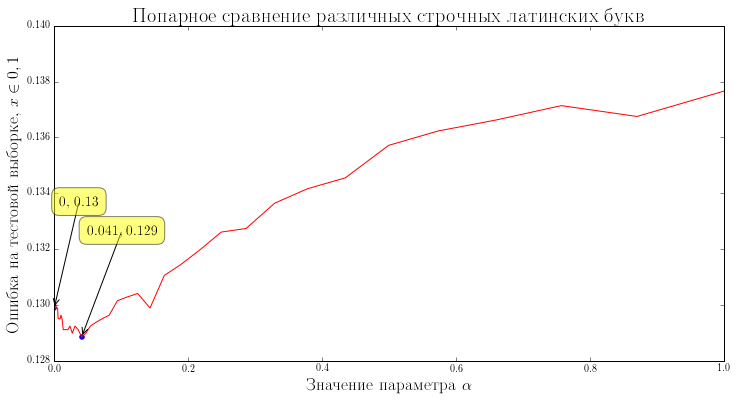

In [122]:
Result = Result_full_low2_corp
fig = plt.figure(figsize=(12, 6))

N_pairs = Result.shape[0]
N_obj = Result.shape[2]
errors = (Result != np.repeat(compare_arr3, 11, axis=-1)[:, np.newaxis]).sum(axis=2).sum(axis=0)
y =  errors / (N_pairs * N_obj)
x = intervals2
plt.title("Попарное сравнение различных строчных латинских букв")#, fontsize=20)
plt.ylabel(r"Ошибка на тестовой выборке, $x \in \[0, 1\]$")#, fontsize=16)
plt.xlabel(r"Значение параметра $\alpha$", fontsize=16)
plt.plot(x, y, color='r')
plt.xlim(0, 1)
xmin, ymin = x[np.argmin(y)], min(y)
labels = ["{0:.3g}, {1:.3g}".format(xmin, ymin),
         "{0:.3g}, {1:.3g}".format(x[0], y[0])]
points = np.array([[xmin, ymin], [x[0], y[0]]])
for label, xp, yp in zip(labels, points[:, 0], points[:, 1]):
    plt.annotate(
            label, 
            xy = (xp,yp), xytext = (5, 100),
            textcoords = 'offset points', ha = 'left', va = 'bottom', fontsize=15,
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    plt.scatter(xp, yp, color='blue')

In [32]:
Result_let_comp = [Result1, Result2, Result3, Result4]

In [18]:
%store Result_let_comp

Stored 'Result_let_comp' (list)


In [19]:
Result1, Result2, Result3, Result4 = tuple(Result_let_comp)

#### Model hyperplain

In [169]:
a_model = Letter_compare_predictions(trans_real_data, np.array([['c', 'e']]),
                                    fines=fines, alphas=intervals, d=None, Dist=Dist_corp, a=True)

In [163]:
with change_printopt(threshold=100, precision=5):
    print(a_model[0][:,:11])
    print(a_model[0][:,11:])

[[ 0.20875  0.10009  0.16512  0.08058  0.1419   0.06589  0.0537   0.08813  0.00733  0.08947  0.10003]]
[[ 0.12736  0.10199  0.05378  0.07431  0.0921   0.12288  0.17958  0.08982  0.15863  0.10204  0.10706]]


In [168]:
with change_printopt(threshold=100, precision=5):
    print(a_model[50][:,:11])
    print(a_model[50][:,11:])

[[ 0.12786  0.10366  0.1252   0.10691  0.11417  0.1044   0.10146  0.12085  0.09355  0.10577  0.10983]]
[[ 0.12348  0.10881  0.10087  0.11209  0.11117  0.12665  0.14589  0.09019  0.13774  0.11288  0.09101]]


### 3) Эксперименты на стандартным таском (не готовы)

In [124]:
def Standard_task(real_data, y_3dim, fines, alphas, gamma=1, d=None, Dist=Dist_corp):
    """Train/Test eperiment: divided by repetitions"""
    global y_values, lexicon, max_d
    import time; tm = time.time(); n_tm = time.time()
    def nline(): print(flush=True)

    N_let, N_wr = real_data.shape[0], real_data.shape[1]
    N_obj = real_data[:, 0, :].size // (2*max_d)
    print("---|||--- Standard_task ---|||---",flush=True); nline()
    models_pred = np.empty((alphas.size, N_wr, N_obj), dtype=np.str)
    full_ind = np.arange(real_data.shape[0]*real_data.shape[1]*real_data.shape[2])
    for wr in range(N_wr):
        #Training
        #########################
        print("Start with writer", wr+1, ": {:.3f}".format((time.time() - tm) / 60), " min from start", flush=True)
        #########################
        n_tm = time.time()
        wr_train = list(set(np.arange(N_wr)) - set([wr]))
        X_train = real_data[:, wr_train, :].reshape(-1, 2, max_d)
        y_train = y_3dim[:, wr_train, :].reshape(-1, 1)
        not_set = ( set(wr*2 + l*N_wr*2  for l in range(N_let)) |
                     set(1 + wr*2 + l*N_wr*2  for l in range(N_let)) )
        D_ind = list(set(full_ind) - not_set)
        #print(Dist[D_ind, :][:, D_ind].shape)
        linear_models = [svm.multi_solver(X_train,  y_train, 'real', 'primal', mode='ovo', Dist=Dist[D_ind, :][:, D_ind],
                                          fines=fines, gamma=1, alpha=alpha, d=d) for alpha in alphas]
        #Pr########################
        n_tm = time.time() - n_tm
        print("\t",n_tm / 60, " min for training", flush=True)
        print("\t",(time.time() - tm) / 60, " min from start", flush=True)
        #Pr########################
        print("\tWriter ", wr+1, flush=True)
        print("\tTraining done!", flush=True); nline()
        #Testing
        #########################
        n_tm = time.time()
        X_test = real_data[:, wr, :].reshape(-1, 2, max_d)
        y_test = y_3dim[:, wr, :].reshape(-1, 1)
        #print(B.shape)
        #linear_models = [[[np.arange(40),0]]]
        for i, model in enumerate(linear_models):
            models_pred[i, wr, :] = keys[svm.multi_predict(X_test, model, 'real', 'primal', mode='ovo', Dist=Dist[list(not_set),:][:, D_ind],
                                                      a_list=model, X_train=X_train, y_train=y_train,
                                                      fines=fines, d=d)]
        #Pr########################
        n_tm = time.time() - n_tm
        print("\t",n_tm / 60, " min for prediction", flush=True)
        print("\t",(time.time() - tm) / 60, " min from start", flush=True)
        #Pr########################
        print("\tWriter ", wr+1, flush=True)
        print("\tTesting done!", flush=True); nline()
    print(flush=True)
    print("---|||--- Time elapsed: ", (time.time() - tm)/60, " min ---|||---")
    
    return models_pred

In [128]:
D_ind = [let*11*2 + wr*2 + rep for let in low_let_ind for wr in range(11) for rep in range(2)]

In [ ]:
#%%prun  -T standard_task_mini_logger.txt 
Result_standard_tmp = Standard_task(trans_real_data[low_let_ind], y_low3dim,
                                np.array([0, 0, 0]), intervals2, Dist=Dist_corp[D_ind, :][:, D_ind])

---|||--- Standard_task ---|||---

Start with writer 1 : 0.000  min from start


In [71]:
with change_printopt(threshold=1000):
    print(np.unique(Result_standard))

['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


In [ ]:
sh = Result_standard.shape
Result_standard = Result_standard.reshape(sh[0], sh[1], -1, 2)

In [69]:
print(Result_standard)

[[[['i' 'i']
   ['e' 'e']
   ['c' 'c']
   ..., 
   ['h' 'k']
   ['x' 'r']
   ['t' 't']]

  [['o' 'o']
   ['j' 'i']
   ['l' 'e']
   ..., 
   ['k' 'k']
   ['r' 'v']
   ['a' 'x']]

  [['z' 'a']
   ['f' 'f']
   ['l' 'l']
   ..., 
   ['k' 'i']
   ['s' 'q']
   ['r' 'r']]

  ..., 
  [['i' 'i']
   ['s' 'r']
   ['c' 'x']
   ..., 
   ['k' 'k']
   ['w' 'w']
   ['z' 'c']]

  [['e' 'e']
   ['n' 'u']
   ['r' 'r']
   ..., 
   ['j' 'j']
   ['q' 'g']
   ['w' 'w']]

  [['b' 'e']
   ['m' 'm']
   ['t' 'r']
   ..., 
   ['n' 'a']
   ['g' 'p']
   ['w' 'm']]]


 [[['i' 'i']
   ['e' 'e']
   ['c' 'c']
   ..., 
   ['h' 'k']
   ['x' 'r']
   ['t' 't']]

  [['o' 'o']
   ['j' 'i']
   ['l' 'e']
   ..., 
   ['k' 'k']
   ['r' 'v']
   ['a' 'x']]

  [['z' 'a']
   ['f' 'f']
   ['l' 'l']
   ..., 
   ['k' 'i']
   ['s' 'q']
   ['r' 'r']]

  ..., 
  [['i' 'i']
   ['s' 'r']
   ['c' 'x']
   ..., 
   ['k' 'k']
   ['w' 'w']
   ['z' 'c']]

  [['e' 'e']
   ['n' 'u']
   ['r' 'r']
   ..., 
   ['j' 'j']
   ['q' 'g']
   ['w' 'w']]

  [

In [97]:
%store Result_standard

Stored 'Result_standard' (ndarray)


In [71]:
print(keys[y_low3dim].swapaxes(0, 1).shape)

(11, 26, 2)


In [70]:
Result_standard.shape

(201, 11, 26, 2)

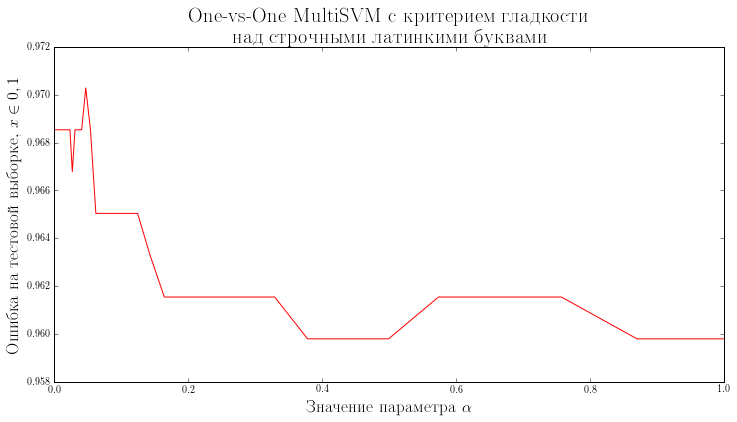

In [123]:
Result = Result_standard
fig = plt.figure()

#N_pairs = Result.shape[0]
#N_obj = Result.shape[2]
errors = (Result != keys[y_low3dim].swapaxes(0, 1)[np.newaxis,...]).sum(axis=-1).sum(axis=-1).sum(axis=-1)
y =  errors / (np.product(Result.shape[1:]))
x = intervals2
plt.title("One-vs-One MultiSVM с критерием гладкости \n над строчными латинкими буквами")#, fontsize=20)
plt.ylabel(r"Ошибка на тестовой выборке, $x \in \[0, 1\]$")#, fontsize=16)
plt.xlabel(r"Значение параметра $\alpha$", fontsize=16)
plt.plot(x, y, color='r')
plt.xlim(0, 1)
xmin, ymin = x[np.argmin(y)], min(y)
# labels = ["{0:.3g}, {1:.3g}".format(xmin, ymin),
#          "{0:.3g}, {1:.3g}".format(x[0], y[0])]
# points = np.array([[xmin, ymin], [x[0], y[0]]])
# for label, xp, yp in zip(labels, points[:, 0], points[:, 1]):
#     plt.annotate(
#             label, 
#             xy = (xp,yp), xytext = (5, 100),
#             textcoords = 'offset points', ha = 'left', va = 'bottom', fontsize=15,
#             bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
#             arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
#     plt.scatter(xp, yp, color='blue')

In [ ]:
%prun  -T svm_smooth_real_logger.txt svm.smooth_qp_primal_real_solver(X_train[::4], y_bin[::4], fines=fines, gamma=1, alpha=alpha, verbose=True)

In [77]:
%store Result_standard

Stored 'Result_standard' (ndarray)


In [ ]:
%prun  -T svm_smooth_real_logger_fast.txt svm.smooth_qp_primal_real_solver(X_train[::4], y_bin[::4], fines=fines, gamma=1, alpha=alpha, verbose=True, d=10)

### Скорость DTW сравнения двух букв

In [10]:
fines = np.array([0, 0, 0])

data = trans_real_data.reshape(-1, 2, max_d)

Dist = np.empty((data.shape[0], data.shape[0]), dtype=np.float64)

In [24]:
tm = time.time()
Dist[:682, :682] = sigproc.m_distance_features(data[:682], fines)
tm = time.time() - tm
print(tm / 60)

228.8000824133555


In [ ]:
tm = time.time()
Dist[682:, 682:] = sigproc.m_distance_features(data[682:], fines)
tm = time.time() - tm
print(tm / 60)

In [41]:
tm = time.time()
Dist[:682, 682:] = sigproc.m_distance_features(data[:682], fines, X2=data[682:])
tm = time.time() - tm
print(tm/ 60)

415.3860153357188


In [44]:
Dist[682:, :682] = Dist[:682, 682:].T

In [70]:
%store Dist

Stored 'Dist' (ndarray)


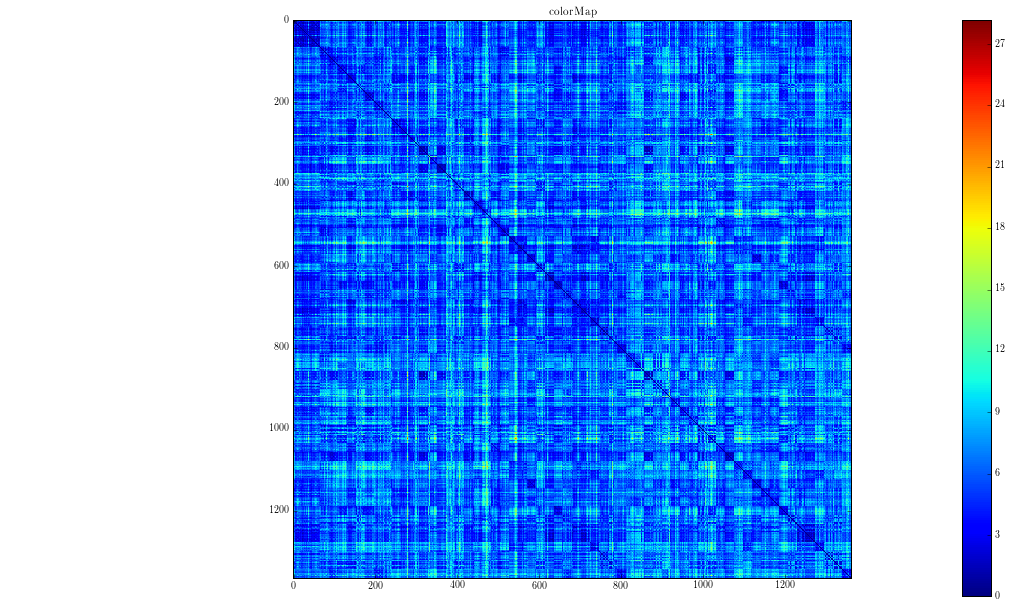

In [105]:
dist_vis(Dist)

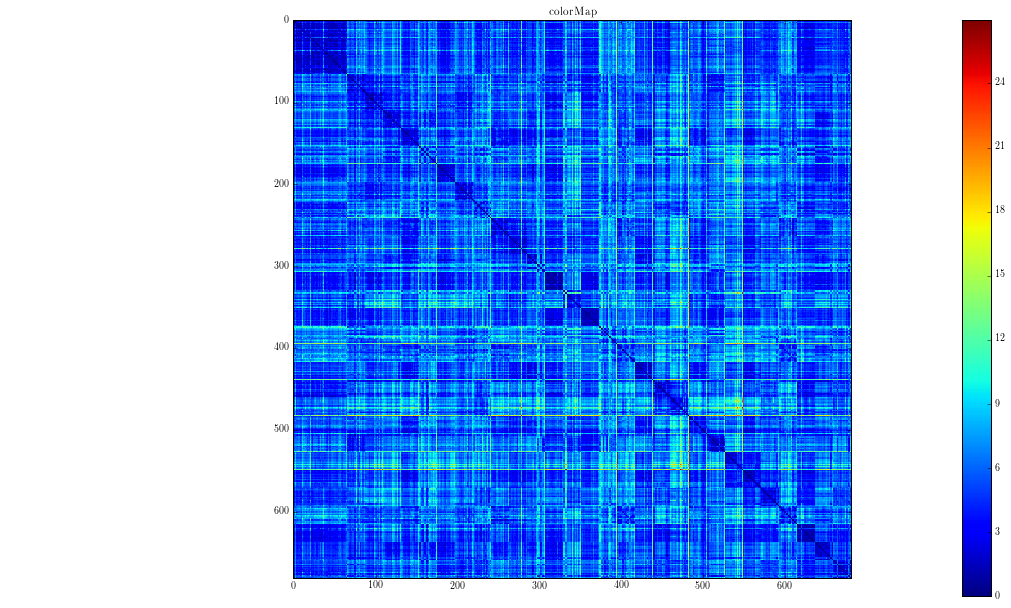

In [106]:
dist_vis(Dist[:682,:682])

In [107]:
print("Procent of <3: {:.5%}".format(np.sum(Dist < 3) / np.prod(Dist.shape)))

Procent of <3: 4.67617%


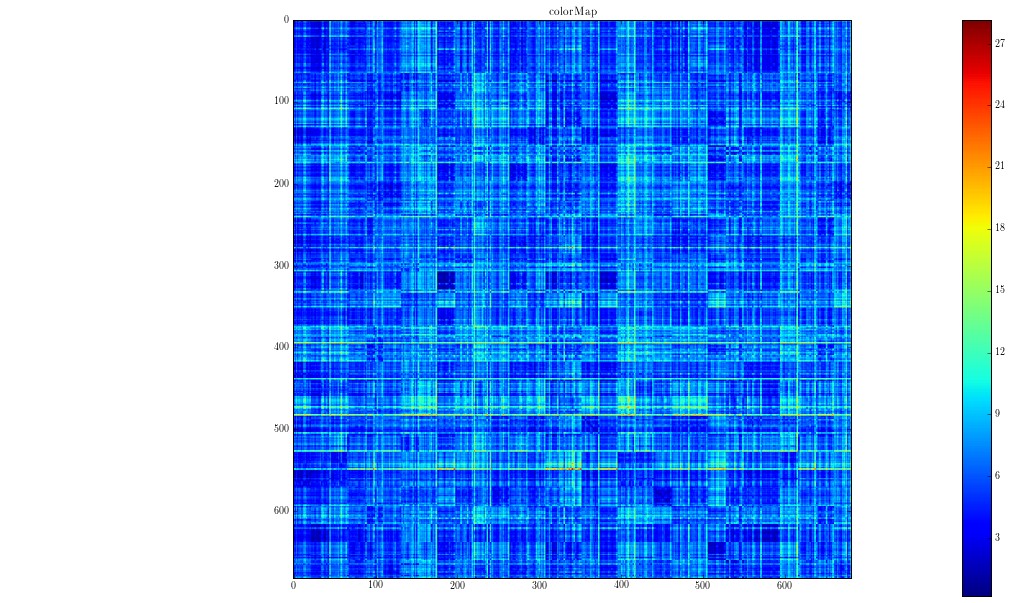

In [60]:
dist_vis(Dist[:682, 682:])

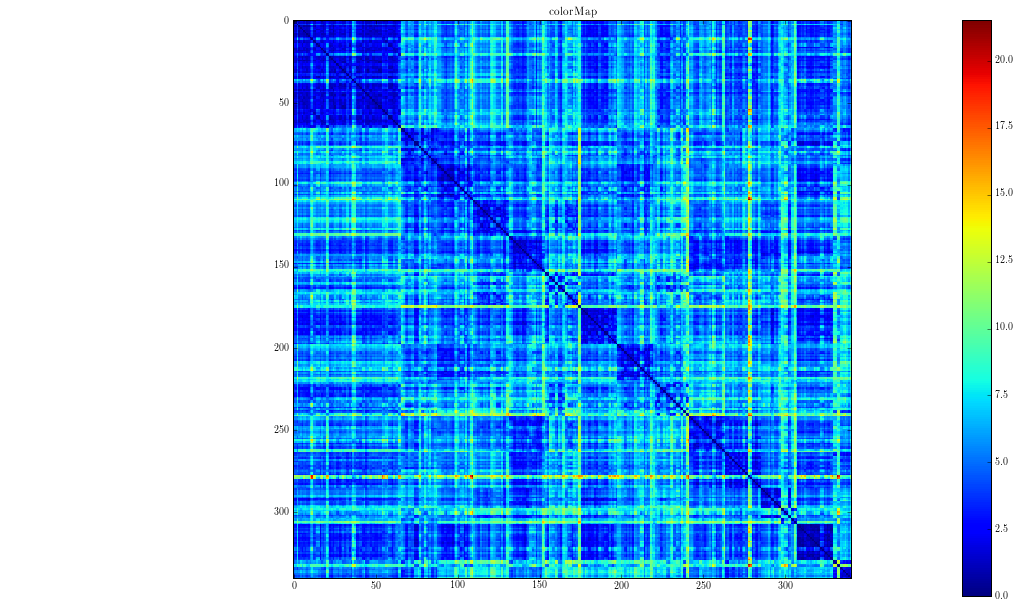

In [108]:
dist_vis(Dist[:341, :341])

In [58]:
smallDist = np.zeros((62, 62), dtype=np.float64)
for i in range(62):
    for j in range(i, 62):
        smallDist[i, j] = np.mean(Dist[i*22: (i+1)*22, j*22: (j+1)*22])
smallDist = smallDist + smallDist.T - np.diag(smallDist.diagonal())

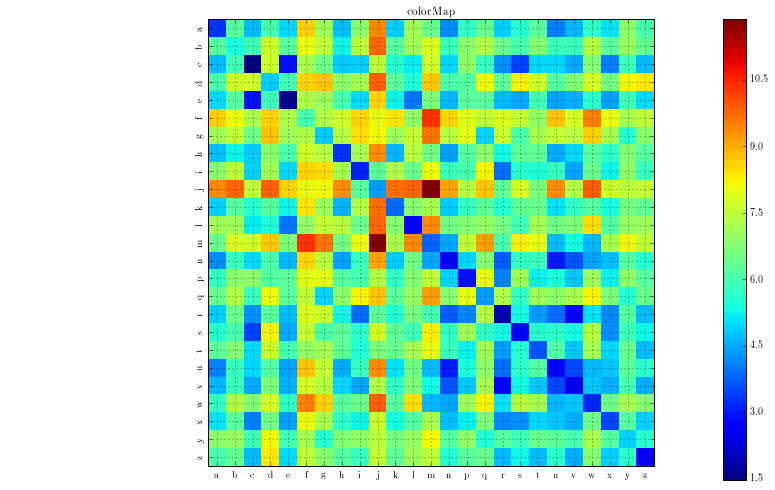

In [64]:
tmpDist = smallDist[12:12+25, 12:12+25].copy()
dist_vis(tmpDist, extra_values=keys[12:12+25])

### Another version of DTW

In [73]:
fines = np.array([0, 0, 0])
data = trans_real_data.reshape(-1, 2, max_d)
Dist_KAT = np.empty((data.shape[0], data.shape[0], 3), dtype=np.float64)

In [75]:
tm = time.time()
Dist_KAT[:682, :682] = sigproc.m_distance_features_based(data[:682], fines)
tm = time.time() - tm
print(tm/ 60)

261.55022515058516


In [76]:
tm = time.time()
Dist_KAT[682:, 682:] = sigproc.m_distance_features_based(data[682:], fines)
tm = time.time() - tm
print(tm/ 60)

307.21092044909796


In [77]:
tm = time.time()
Dist_KAT[:682, 682:] = sigproc.m_distance_features_based(data[:682], fines, X2=data[682:])
tm = time.time() - tm
print(tm/ 60)

565.2006442825


In [82]:
Dist_KAT[682:, :682] = np.swapaxes(Dist_KAT[:682, 682:], 0, 1)

In [ ]:
Dist_KAT[:,:, 1] /= Dist_KAT[:,:, 0]
Dist_KAT[:,:, 2] /= Dist_KAT[:,:, 0] 
Dist_KAT[np.arange(Dist_KAT.shape[0]), np.arange(Dist_KAT.shape[1])] = 0

In [83]:
%store Dist_KAT

Stored 'Dist_KAT' (ndarray)


In [ ]:
smallDist_KAT = np.zeros((62, 62, 3), dtype=np.float64)
for i in range(62):
    for j in range(i, 62):
        for k in range(3):
            smallDist_KAT[i, j, k] = np.mean(Dist_KAT[i*22: (i+1)*22, j*22: (j+1)*22, k])
smallDist_KAT = smallDist_KAT + smallDist_KAT.T - np.diag(smallDist_KAT.diagonal())

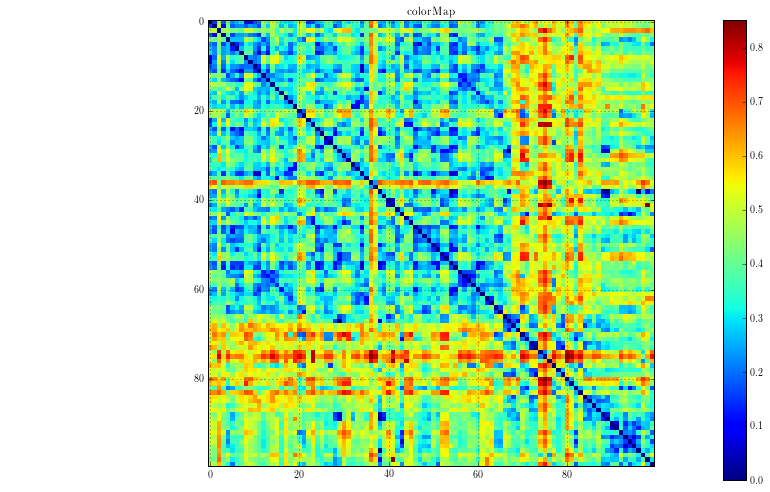

In [22]:
dist_vis(Dist_KAT[:100, :100, 2], extra_values=None)

##### Corporate metric DTW

In [11]:
fines_corp = np.array([1, 5])
Dist_corp = fines_corp[0]*Dist_KAT[...,1] + fines_corp[1]*Dist_KAT[..., 2] 

In [13]:
%store Dist_corp

Stored 'Dist_corp' (ndarray)


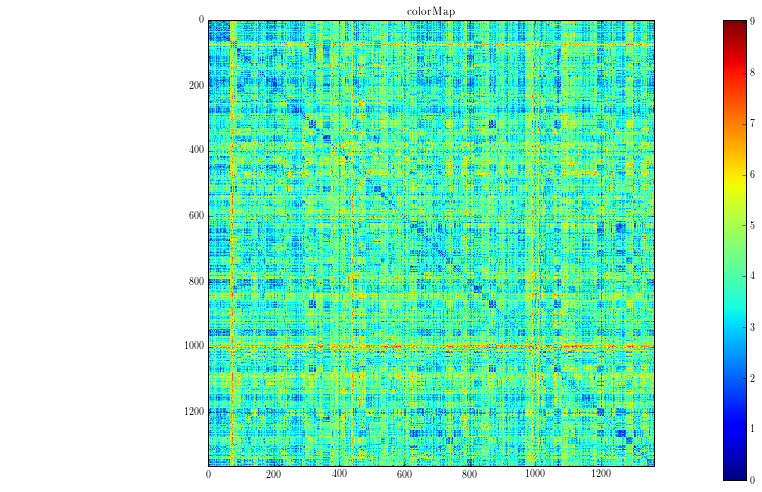

In [12]:
dist_vis(Dist_corp, extra_values=None)

#### Ver2